In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING DATSETS
work=pd.read_excel('flight_train.xlsx',names=('airline','doj','src','dest','rt','dtime','atime','dur','stops','info','price'))
pred=pd.read_excel('flight_test.xlsx',names=('airline','doj','src','dest','rt','dtime','atime','dur','stops','info'))

In [3]:
work.head(10)

,airline,doj,src,dest,rt,dtime,atime,dur,stops,info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
pred.head(10)

,airline,doj,src,dest,rt,dtime,atime,dur,stops,info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [5]:
#In the above datasets we have 2 names for Delhi i.e. Delhi and NewDelhi so making them one   
work.replace('New Delhi','Delhi',inplace=True)
pred.replace('New Delhi','Delhi',inplace=True)

In [6]:
work.dtypes

airline    object
doj        object
src        object
dest       object
rt         object
dtime      object
atime      object
dur        object
stops      object
info       object
price       int64
dtype: object

In [7]:
pred.dtypes

airline    object
doj        object
src        object
dest       object
rt         object
dtime      object
atime      object
dur        object
stops      object
info       object
dtype: object

In [8]:
#checking for null values in work
work.isnull().sum()

airline    0
doj        0
src        0
dest       0
rt         1
dtime      0
atime      0
dur        0
stops      1
info       0
price      0
dtype: int64

In [9]:
#replacing null vales
work['rt'].replace(np.NaN,work['rt'].mode().iloc[0],inplace=True)
work['stops'].replace(np.NaN,work['stops'].mode().iloc[0],inplace=True)

In [10]:
pred.isnull().sum()

airline    0
doj        0
src        0
dest       0
rt         0
dtime      0
atime      0
dur        0
stops      0
info       0
dtype: int64

No null values 

In [11]:
#checking duplicated values in work
dups=work.duplicated(keep='first').sum()
if dups>0:
    w=work.drop_duplicates(keep='first')
    print('Dataset got',dups,' number duplicated rows and removing it....\n' )
    print('Earlier the shape with duplicates was=',work.shape,
          '\nNew shape of dataset after dropping duplicates=',w.shape)
         
else:
    print('The datset has no \'DUPLICATE ROWS\' to remove.')  

Dataset got 220  number duplicated rows and removing it....

Earlier the shape with duplicates was= (10683, 11) 
New shape of dataset after dropping duplicates= (10463, 11)


In [12]:
#creating columns for date,month,and day of journey for work dataset and dropping doj column
w['doj'] = pd.to_datetime(w['doj'])
w['mnth'] = w['doj'].dt.month
w['date'] = w['doj'].dt.day
w['day']=w['doj'].dt.dayofweek
w.drop(['doj'],axis=1,inplace=True)

In [13]:
#creating columns for date,month,and day of journey for pred dataset and dropping doj column
pred['doj'] = pd.to_datetime(pred['doj'])
pred['mnth'] = pred['doj'].dt.month
pred['date'] = pred['doj'].dt.day
pred['day']=pred['doj'].dt.dayofweek
pred.drop(['doj'],axis=1,inplace=True)

In [14]:
#creating a column for arrival hous and minute and departure hours and minute for work dataset

w['d_hr'] = pd.to_datetime(w['dtime']).dt.hour
w['d_min']= pd.to_datetime(w['dtime']).dt.minute

w['a_hr'] = pd.to_datetime(w['atime']).dt.hour
w['a_min']= pd.to_datetime(w['atime']).dt.minute

w.drop(['dtime','atime','dur'],axis=1,inplace=True)

In [15]:
#creating a column for arrival hous and minute and departure hours and minute for work dataset

pred['d_hr'] = pd.to_datetime(pred['dtime']).dt.hour
pred['d_min']= pd.to_datetime(pred['dtime']).dt.minute

pred['a_hr'] = pd.to_datetime(pred['atime']).dt.hour
pred['a_min']= pd.to_datetime(pred['atime']).dt.minute

pred.drop(['dtime','atime','dur'],axis=1,inplace=True)

In [16]:
#checking unique values
for i in w.columns:
    if w[i].dtypes=='object':
        vc=w[i].value_counts()
        print('\nThe number of unique values in--,',i,'is\n','+-+'*30,'\n',vc,'\n\n','+-+'*30)


The number of unique values in--, airline is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64 

 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+

The number of unique values in--, src is
 +-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-++-+ 
 Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: src, dt

In [17]:
w['info'].replace({'No info':'NA','In-flight meal not included':'NO MEAL','No check-in baggage included':'NO CHECKINS',
                   'No Info':'NA','1 Long layover':'LAYOVER','1 Short layover':'LAYOVER','2 Long layover':'LAYOVER',
                  'Change airports':'OTHER','Business class':'OTHER','Red-eye flight':'OTHER'},inplace=True)

In [18]:
w['info'].value_counts()

NA             8186
NO MEAL        1926
NO CHECKINS     318
LAYOVER          21
OTHER            12
Name: info, dtype: int64

In [19]:
pred['info'].replace({'No info':'NA','In-flight meal not included':'NO MEAL','No check-in baggage included':'NO CHECKINS',
                   'No Info':'NA','1 Long layover':'LAYOVER','1 Short layover':'LAYOVER','2 Long layover':'LAYOVER',
                  'Change airports':'OTHER','Business class':'OTHER','Red-eye flight':'OTHER'},inplace=True)

In [20]:
pred['info'].value_counts()

NA             2148
NO MEAL         444
NO CHECKINS      76
OTHER             2
LAYOVER           1
Name: info, dtype: int64

In [21]:
w['stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [22]:
w['stops'].value_counts()

1    5626
0    3475
2    1318
3      43
4       1
Name: stops, dtype: int64

In [23]:
pred['stops'].replace({'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [24]:
pred['stops'].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: stops, dtype: int64

In [25]:
#spliting the 'rt' into different columns to show roots and dropping  src,dest and rt for w dataset
#  u"\u2192" = →
w['r1']=w['rt'].str.split('→').str[0]
w['r2']=w['rt'].str.split('→').str[1]
w['r3']=w['rt'].str.split('→').str[2]
w['r4']=w['rt'].str.split('→').str[3]
w['r5']=w['rt'].str.split('→').str[4]

In [26]:
#nan values will be created after the final root for few cases so replacing those values with 'not req' as the plave has reached the destination
for i in ('r1','r2','r3','r4','r5'):
    if w[i].isnull().sum()>0:
        w[i]=w[i].replace(np.NaN,'not req')

In [27]:
w.isnull().sum()

airline    0
src        0
dest       0
rt         0
stops      0
info       0
price      0
mnth       0
date       0
day        0
d_hr       0
d_min      0
a_hr       0
a_min      0
r1         0
r2         0
r3         0
r4         0
r5         0
dtype: int64

In [28]:
#spliting the 'rt' into different columns to show roots and dropping  src,dest and rt for pred dataset
pred['r1']=pred['rt'].str.split('→').str[0] 
pred['r2']=pred['rt'].str.split('→').str[1]
pred['r3']=pred['rt'].str.split('→').str[2]
pred['r4']=pred['rt'].str.split('→').str[3]
pred['r5']=pred['rt'].str.split('→').str[4]

In [29]:
#nan values will be created after the final root for few cases so replacing those values with 'not req' as the plave has reached the destination
for i in ('r1','r2','r3','r4','r5'):
    if pred[i].isnull().sum()>0:
        pred[i]=w[i].replace(np.NaN,'not req')

In [30]:
pred.isnull().sum()

airline     0
src         0
dest        0
rt          0
stops       0
info        0
mnth        0
date        0
day         0
d_hr        0
d_min       0
a_hr        0
a_min       0
r1          0
r2          0
r3         15
r4         15
r5         15
dtype: int64

In [31]:
#removing the remaining null values
pred['r3'].fillna("not req",inplace=True)
pred['r4'].fillna("not req",inplace=True)
pred['r5'].fillna("not req",inplace=True)

In [32]:
pred.isnull().sum()

airline    0
src        0
dest       0
rt         0
stops      0
info       0
mnth       0
date       0
day        0
d_hr       0
d_min      0
a_hr       0
a_min      0
r1         0
r2         0
r3         0
r4         0
r5         0
dtype: int64

In [33]:
#changing the names of the airlines 
w['airline'].replace({'Jet Airways':'JetAirs','Air India':'AirInd','Multiple carriers':'MulCar',                                         
                      'SpiceJet':'Sp.Jet', 'Vistara':'Vist.', 'Air Asia':'AAsia','GoAir':'GA',
                      'Multiple carriers Premium economy':' MulCar PEco.','Jet Airways Business':'JetAir Buss.',
                      'Vistara Premium economy':'Vist. PEco','Trujet':'Tjet'},inplace=True)

In [34]:
pred['airline'].replace({'Jet Airways':'JetAirs','Air India':'AirInd','Multiple carriers':'MulCar',                                         
                      'SpiceJet':'Sp.Jet', 'Vistara':'Vist.', 'Air Asia':'AAsia','GoAir':'GA',
                      'Multiple carriers Premium economy':' MulCar PEco.','Jet Airways Business':'JetAir Buss.',
                      'Vistara Premium economy':'Vist. PEco','Trujet':'Tjet'},inplace=True)

In [35]:
#rearranging the columns in both datasets for batter understanding
w=w[['airline','mnth','date','day','src','dest','rt','r1','r2','r3','r4','r5','d_hr','d_min','a_hr','a_min','stops','info','price']]
pred=pred[['airline','mnth','date','day','src','dest','rt','r1','r2','r3','r4','r5','d_hr','d_min','a_hr','a_min','stops','info']]

In [36]:
w.head(5)

,airline,mnth,date,day,src,dest,rt,r1,r2,r3,r4,r5,d_hr,d_min,a_hr,a_min,stops,info,price
0,IndiGo,3,24,6,Banglore,Delhi,BLR → DEL,BLR,DEL,not req,not req,not req,22,20,1,10,0,NA,3897
1,AirInd,1,5,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,not req,5,50,13,15,2,NA,7662
2,JetAirs,9,6,4,Delhi,Cochin,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,not req,9,25,4,25,2,NA,13882
3,IndiGo,12,5,3,Kolkata,Banglore,CCU → NAG → BLR,CCU,NAG,BLR,not req,not req,18,5,23,30,1,NA,6218
4,IndiGo,1,3,3,Banglore,Delhi,BLR → NAG → DEL,BLR,NAG,DEL,not req,not req,16,50,21,35,1,NA,13302


In [37]:
pred.head(5)

,airline,mnth,date,day,src,dest,rt,r1,r2,r3,r4,r5,d_hr,d_min,a_hr,a_min,stops,info
0,JetAirs,6,6,3,Delhi,Cochin,DEL → BOM → COK,DEL,BOM,not req,not req,not req,17,30,4,25,1,NA
1,IndiGo,12,5,3,Kolkata,Banglore,CCU → MAA → BLR,CCU,MAA,BBI,BLR,not req,6,20,10,20,1,NA
2,JetAirs,5,21,1,Delhi,Cochin,DEL → BOM → COK,DEL,BOM,BOM,COK,not req,19,15,19,0,1,NO MEAL
3,MulCar,5,21,1,Delhi,Cochin,DEL → BOM → COK,DEL,BOM,BLR,not req,not req,8,0,21,0,1,NA
4,AAsia,6,24,0,Banglore,Delhi,BLR → DEL,BLR,DEL,DEL,not req,not req,23,55,2,45,0,NA


In [38]:
pd.crosstab(w['src'],w['dest'])
#checking number of fligfts between two stations

dest,Banglore,Cochin,Delhi,Hyderabad,Kolkata
src,,,,,
Banglore,0,0,2179,0,0
Chennai,0,0,0,0,381
Delhi,0,4346,0,0,0
Kolkata,2860,0,0,0,0
Mumbai,0,0,0,697,0


In [39]:
pd.crosstab(w['airline'],w['stops'])

stops,0,1,2,3,4
airline,,,,,
MulCar PEco.,0,13,0,0,0
AAsia,181,129,9,0,0
AirInd,416,541,702,35,1
GA,92,102,0,0,0
IndiGo,1231,793,19,0,0
JetAir Buss.,0,4,2,0,0
JetAirs,622,2535,543,0,0
MulCar,0,1145,43,8,0
Sp.Jet,667,148,0,0,0


In [40]:
pd.crosstab(w['stops'],w['dest'])

dest,Banglore,Cochin,Delhi,Hyderabad,Kolkata
stops,,,,,
0,724,213,1536,621,381
1,1834,3186,562,44,0
2,291,924,73,30,0
3,11,23,7,2,0
4,0,0,1,0,0


In [41]:
pd.crosstab(w['airline'],w['src'])

src,Banglore,Chennai,Delhi,Kolkata,Mumbai
airline,,,,,
MulCar PEco.,0,0,13,0,0
AAsia,89,0,80,150,0
AirInd,329,25,704,501,136
GA,93,0,76,25,0
IndiGo,513,184,705,445,196
JetAir Buss.,4,0,2,0,0
JetAirs,787,0,1438,1256,219
MulCar,0,0,1196,0,0
Sp.Jet,178,128,87,300,122


In [42]:
pd.crosstab(pred['airline'],pred['src'])

src,Banglore,Chennai,Delhi,Kolkata,Mumbai
airline,,,,,
MulCar PEco.,0,0,3,0,0
AAsia,22,0,20,44,0
AirInd,81,5,186,128,40
GA,23,0,16,7,0
IndiGo,124,30,196,112,49
JetAir Buss.,2,0,0,0,0
JetAirs,198,0,345,304,50
MulCar,0,0,347,0,0
Sp.Jet,43,34,19,71,41


In [43]:
pd.crosstab(w['airline'],w['info'])

info,LAYOVER,NA,NO CHECKINS,NO MEAL,OTHER
airline,,,,,
MulCar PEco.,0,13,0,0,0
AAsia,0,318,0,0,1
AirInd,8,1680,0,0,7
GA,0,194,0,0,0
IndiGo,0,2043,0,0,0
JetAir Buss.,0,3,0,0,3
JetAirs,12,1857,0,1830,1
MulCar,0,1100,0,96,0
Sp.Jet,1,496,318,0,0


In [44]:
pd.crosstab(pred['airline'],pred['info'])

info,LAYOVER,NA,NO CHECKINS,NO MEAL,OTHER
airline,,,,,
MulCar PEco.,0,3,0,0,0
AAsia,0,86,0,0,0
AirInd,0,439,0,0,1
GA,0,46,0,0,0
IndiGo,0,511,0,0,0
JetAir Buss.,0,1,0,0,1
JetAirs,1,469,0,427,0
MulCar,0,330,0,17,0
Sp.Jet,0,132,76,0,0


In [45]:
w.groupby(w['dest']).agg(pd.Series.mode)

,airline,mnth,date,day,src,rt,r1,r2,r3,r4,r5,d_hr,d_min,a_hr,a_min,stops,info,price
dest,,,,,,,,,,,,,,,,,,
Banglore,JetAirs,5,5,4,Kolkata,CCU → BOM → BLR,CCU,BOM,BLR,not req,not req,20,0,23,20,1,NA,10844
Cochin,JetAirs,6,6,3,Delhi,DEL → BOM → COK,DEL,BOM,COK,not req,not req,7,0,19,0,1,NA,10262
Delhi,JetAirs,3,3,3,Banglore,BLR → DEL,BLR,DEL,not req,not req,not req,"[8, 11]",0,8,20,0,NA,7229
Hyderabad,JetAirs,6,3,0,Mumbai,BOM → HYD,BOM,HYD,not req,not req,not req,19,5,7,25,0,NA,5678
Kolkata,IndiGo,6,5,3,Chennai,MAA → CCU,MAA,CCU,not req,not req,not req,17,45,10,5,0,NA,3597


In [46]:
w['price'].groupby(w['stops']).mean()

stops
0     5018.506763
1    10593.570032
2    12761.099393
3    13260.674419
4    17686.000000
Name: price, dtype: float64

In [47]:
w.min()

airline       MulCar PEco.
mnth                     1
date                     3
day                      0
src               Banglore
dest              Banglore
rt         BLR → AMD → DEL
r1                    BLR 
r2                    AMD 
r3                    AMD 
r4                    AMD 
r5                     BLR
d_hr                     0
d_min                    0
a_hr                     0
a_min                    0
stops                    0
info               LAYOVER
price                 1759
dtype: object

In [48]:
w.max()

airline    Vist. PEco
mnth               12
date               27
day                 6
src            Mumbai
dest          Kolkata
rt          MAA → CCU
r1               MAA 
r2               VTZ 
r3            not req
r4            not req
r5            not req
d_hr               23
d_min              55
a_hr               23
a_min              55
stops               4
info            OTHER
price           79512
dtype: object

In [49]:
w.describe()

,mnth,date,day,d_hr,d_min,a_hr,a_min,stops,price
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,5.534646,12.629361,2.890567,12.478161,24.406958,13.387269,24.719966,0.802351,9026.642454
std,2.995204,8.791531,1.832962,5.727055,18.815897,6.855353,16.569658,0.660580,4624.653227
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,5.000000,1.000000,8.000000,5.000000,8.000000,10.000000,0.000000,5224.000000
50%,5.000000,6.000000,3.000000,11.000000,25.000000,14.000000,25.000000,1.000000,8266.000000
75%,6.000000,21.000000,4.000000,18.000000,40.000000,19.000000,35.000000,1.000000,12343.500000
max,12.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,4.000000,79512.000000


In [50]:
pred.describe()

,mnth,date,day,d_hr,d_min,a_hr,a_min,stops
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,5.607263,12.026956,2.931486,12.603519,24.891426,13.585174,24.558218,0.833396
std,3.042952,8.564408,1.843143,5.686673,19.086522,7.040396,16.775436,0.672315
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,2.000000,8.000000,5.000000,8.000000,10.000000,0.000000
50%,5.000000,6.000000,3.000000,12.000000,25.000000,15.000000,25.000000,1.000000
75%,6.000000,21.000000,4.000000,18.000000,45.000000,19.000000,35.000000,1.000000
max,12.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,4.000000


In [51]:
w.describe(include='object')

,airline,src,dest,rt,r1,r2,r3,r4,r5,info
count,10463,10463,10463,10463,10463,10463,10463,10463,10463,10463
unique,12,5,5,128,5,45,30,14,6,5
top,JetAirs,Delhi,Cochin,DEL → BOM → COK,DEL,BOM,not req,not req,not req,NA
freq,3700,4346,4346,2377,4346,3863,3475,9101,10419,8186


In [52]:
pred.describe(include='object')

,airline,src,dest,rt,r1,r2,r3,r4,r5,info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,5,5,100,5,39,23,8,5,5
top,JetAirs,Delhi,Cochin,DEL → BOM → COK,DEL,BOM,not req,not req,not req,NA
freq,897,1145,1145,624,1145,1023,865,2306,2664,2148


IMPLEMENTING GRAPHICAL METHODS 

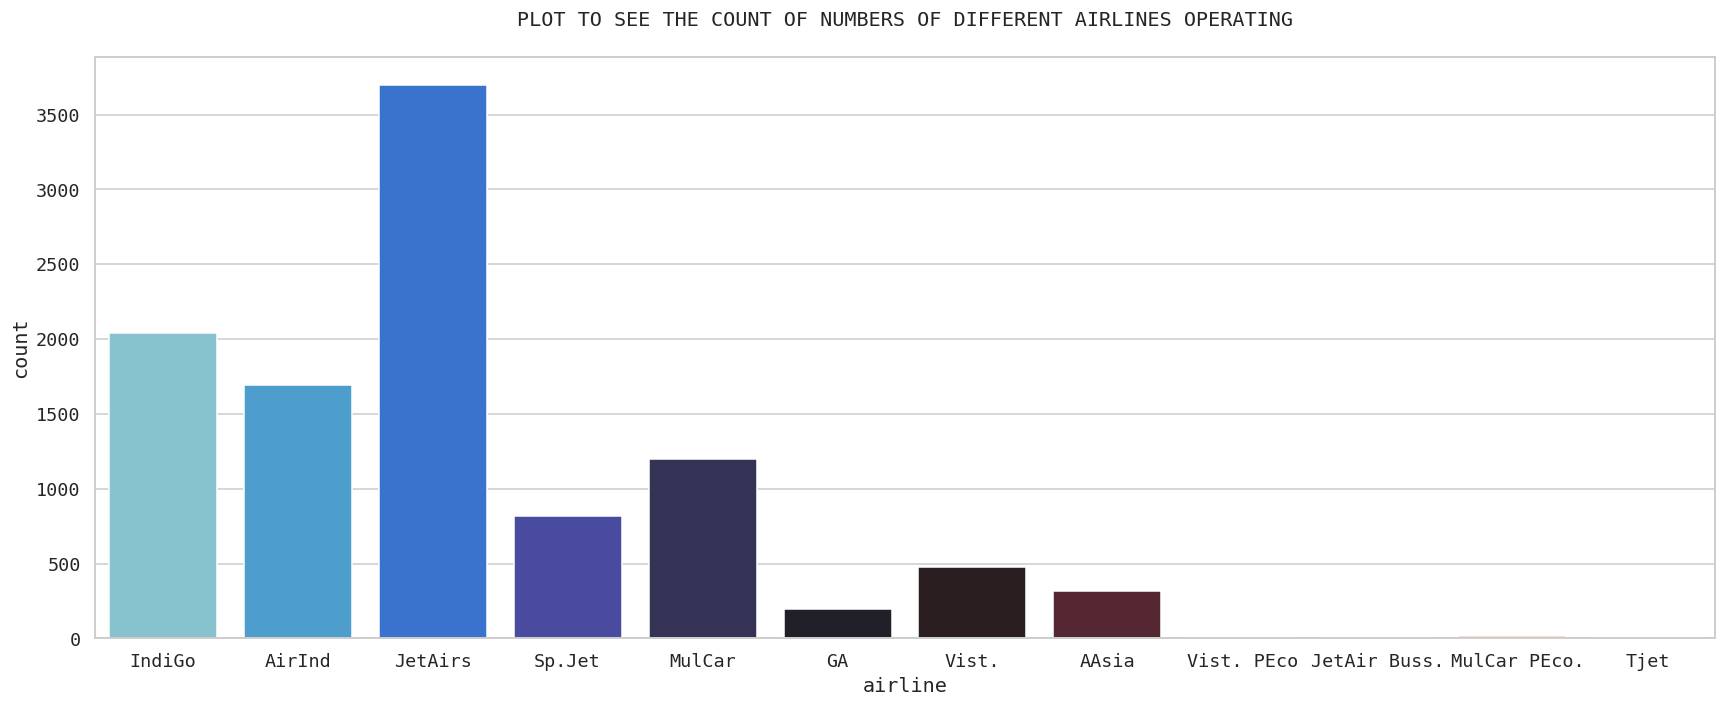

In [53]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='airline',data=w,orient='v',palette='icefire',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF NUMBERS OF DIFFERENT AIRLINES OPERATING\n')
plt.show()



                             JET AIRS HAS THE HIGHEST NUMBER OF FLIGHTS OPERATING

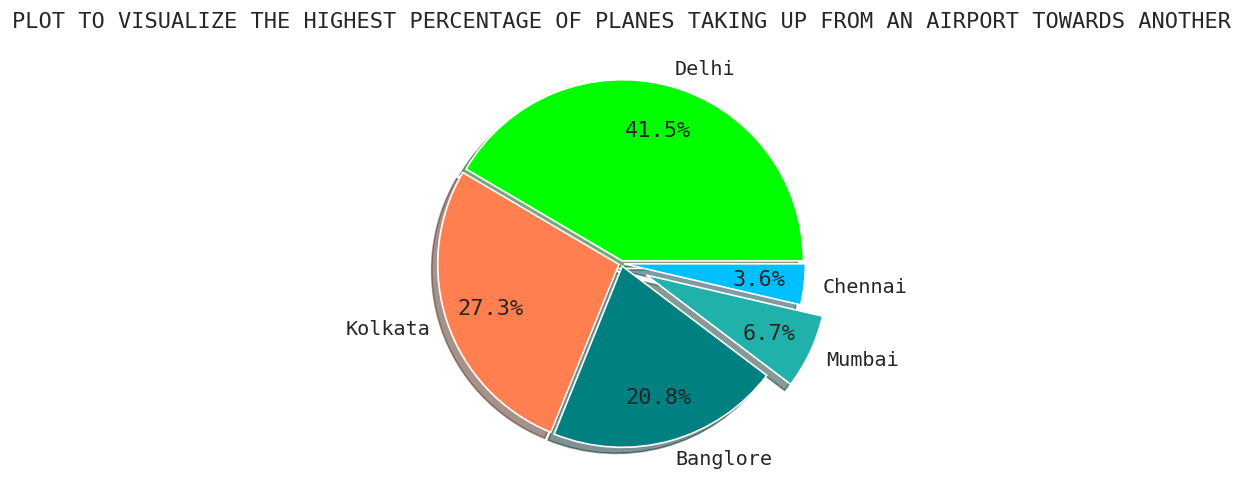

In [54]:
w_lb=w['src'].value_counts().index.tolist()
w_val=w['src'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.15,0.015)
clr=('lime','coral','teal','lightseagreen','deepskyblue')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
plt.pie(x=w_val,explode=exp,labels=w_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE HIGHEST PERCENTAGE OF PLANES TAKING UP FROM AN AIRPORT TOWARDS ANOTHER')
plt.show()

                                            FROM DELHI HIGHEST NUMBER OF FLIGHTS DEPART 

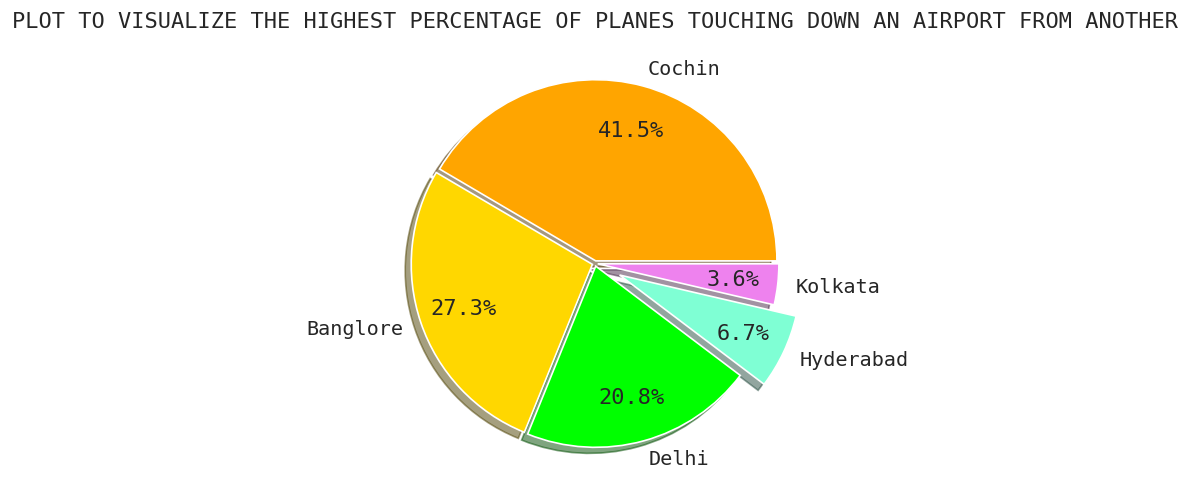

In [55]:
w_lb=w['dest'].value_counts().index.tolist()
w_val=w['dest'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.15,0.015)
clr=('orange','gold','lime','aquamarine','violet')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
plt.pie(x=w_val,explode=exp,labels=w_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.75, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE HIGHEST PERCENTAGE OF PLANES TOUCHING DOWN AN AIRPORT FROM ANOTHER')
plt.show()

                                        COCHIN HAS THE HIGHEST RECORD OF PLANE LANDING

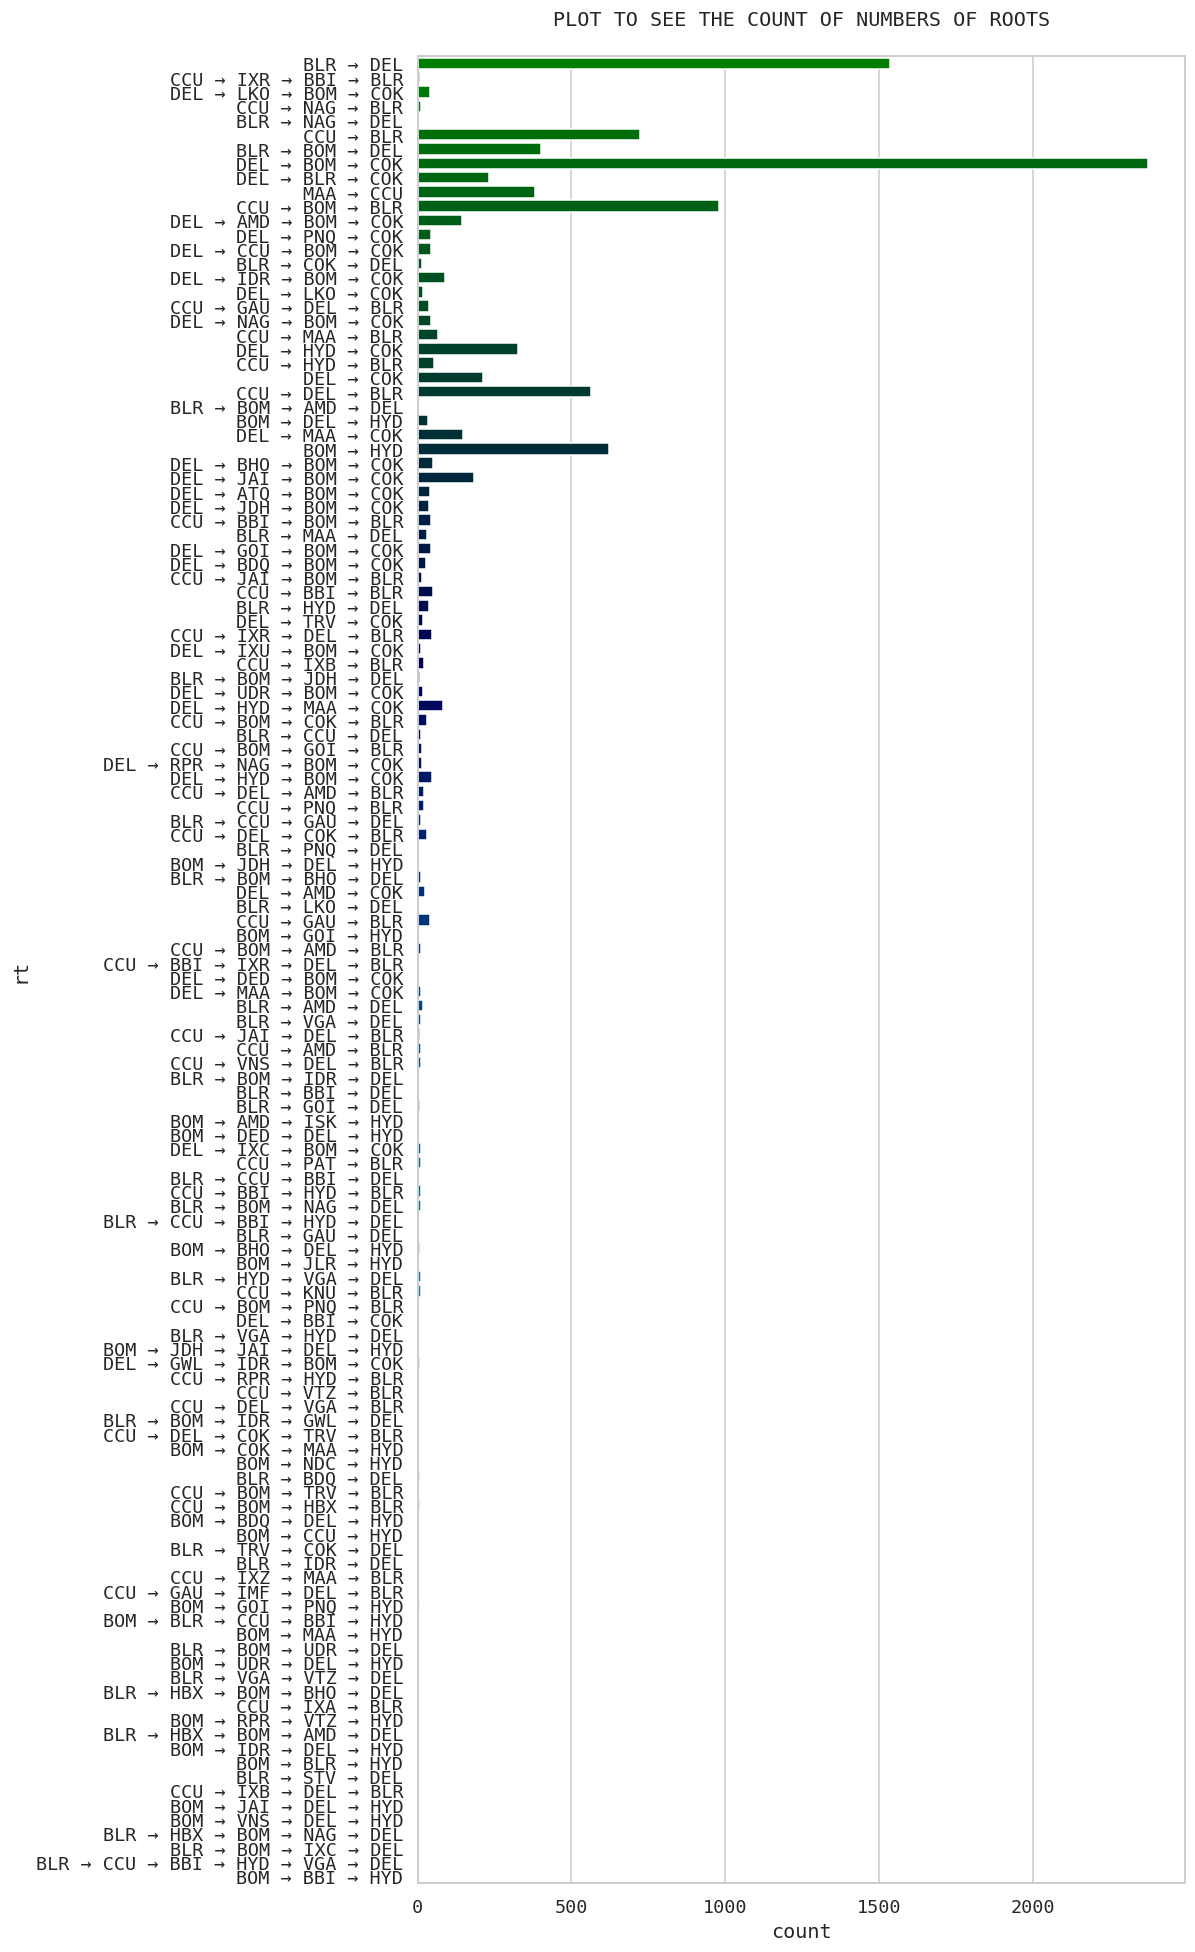

In [56]:
plt.figure(figsize=(9,22),dpi=110)
sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(y='rt',data=w,orient='h',palette='ocean',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF NUMBERS OF ROOTS\n')
plt.show()


            HIGHEST NUMBER OF FLIGHTS RUN BETWEEN DELHI TO COCHIN WITH A LAYOYVER AT MUMBAI 

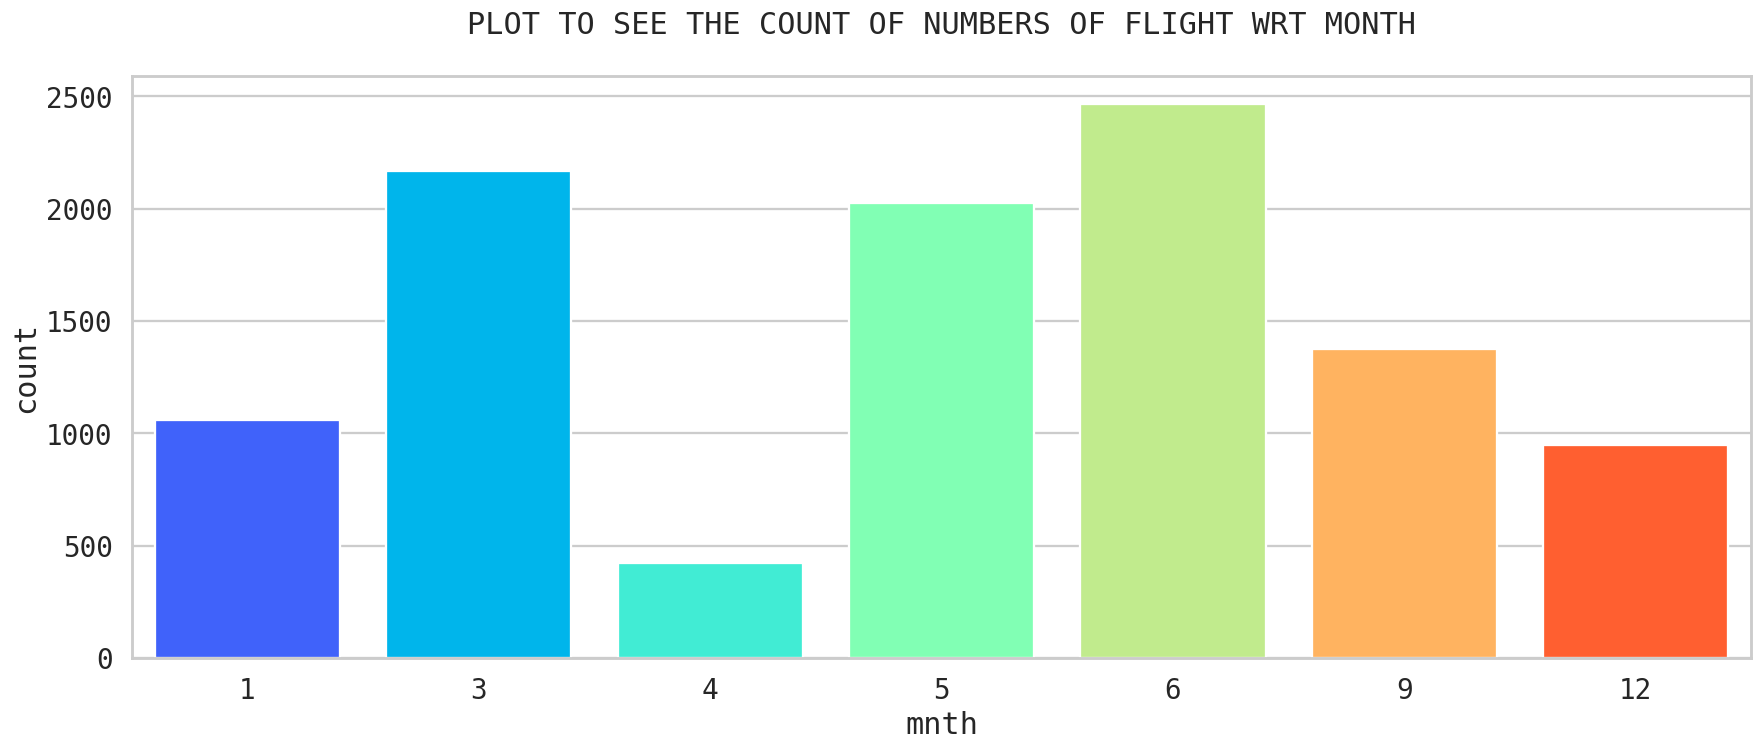

In [57]:
plt.figure(figsize=(19,7),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='mnth',data=w,orient='v',palette='rainbow',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF NUMBERS OF FLIGHT WRT MONTH\n')
plt.show()

                            IN THEE MONTH OF JUNE HIGHEST NUMBER OF ACTIVITIES CN BE SEEN

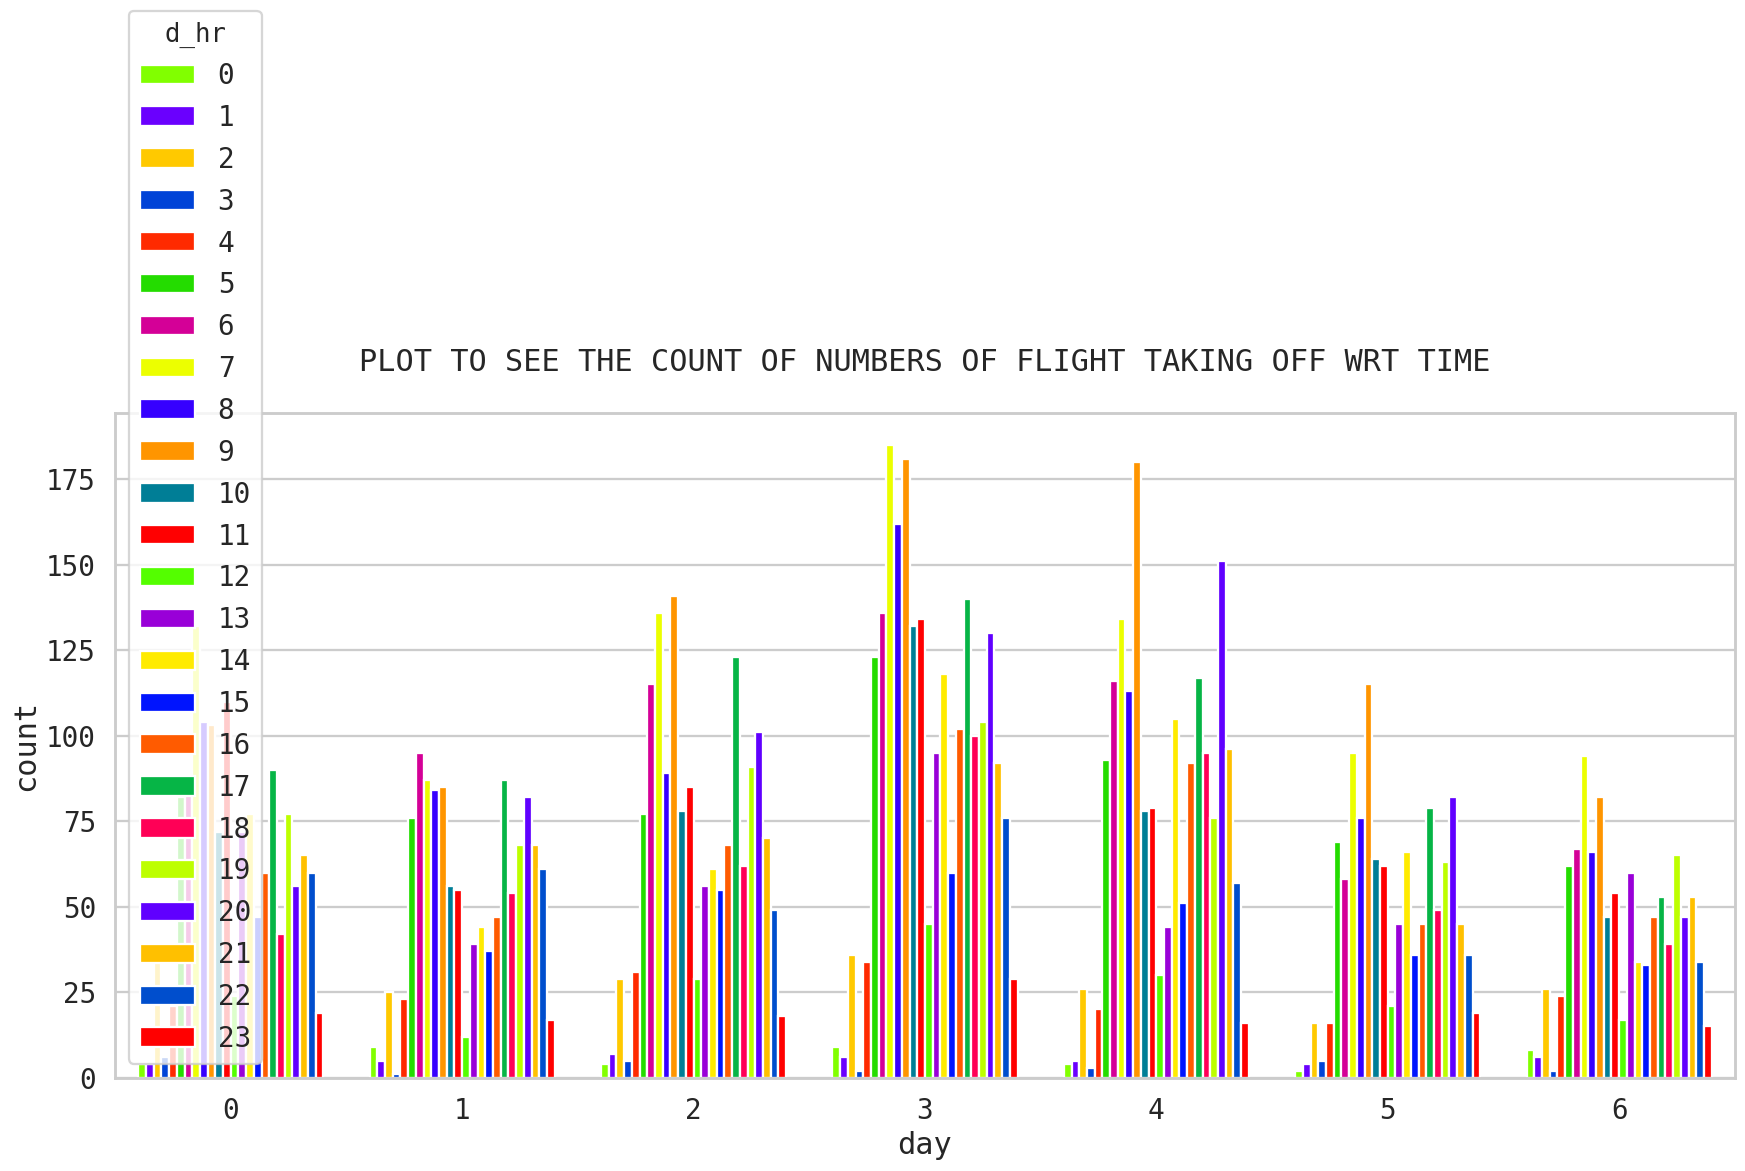

In [58]:
plt.figure(figsize=(19,8),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.countplot(x='day',data=w,hue='d_hr',orient='v',palette='prism',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF NUMBERS OF FLIGHT TAKING OFF WRT TIME\n')
plt.show()

                        HIGHEST NUMBER OF FLIGHT DEPARTS AT 7AM OF DAY3 I.E THURSDAY

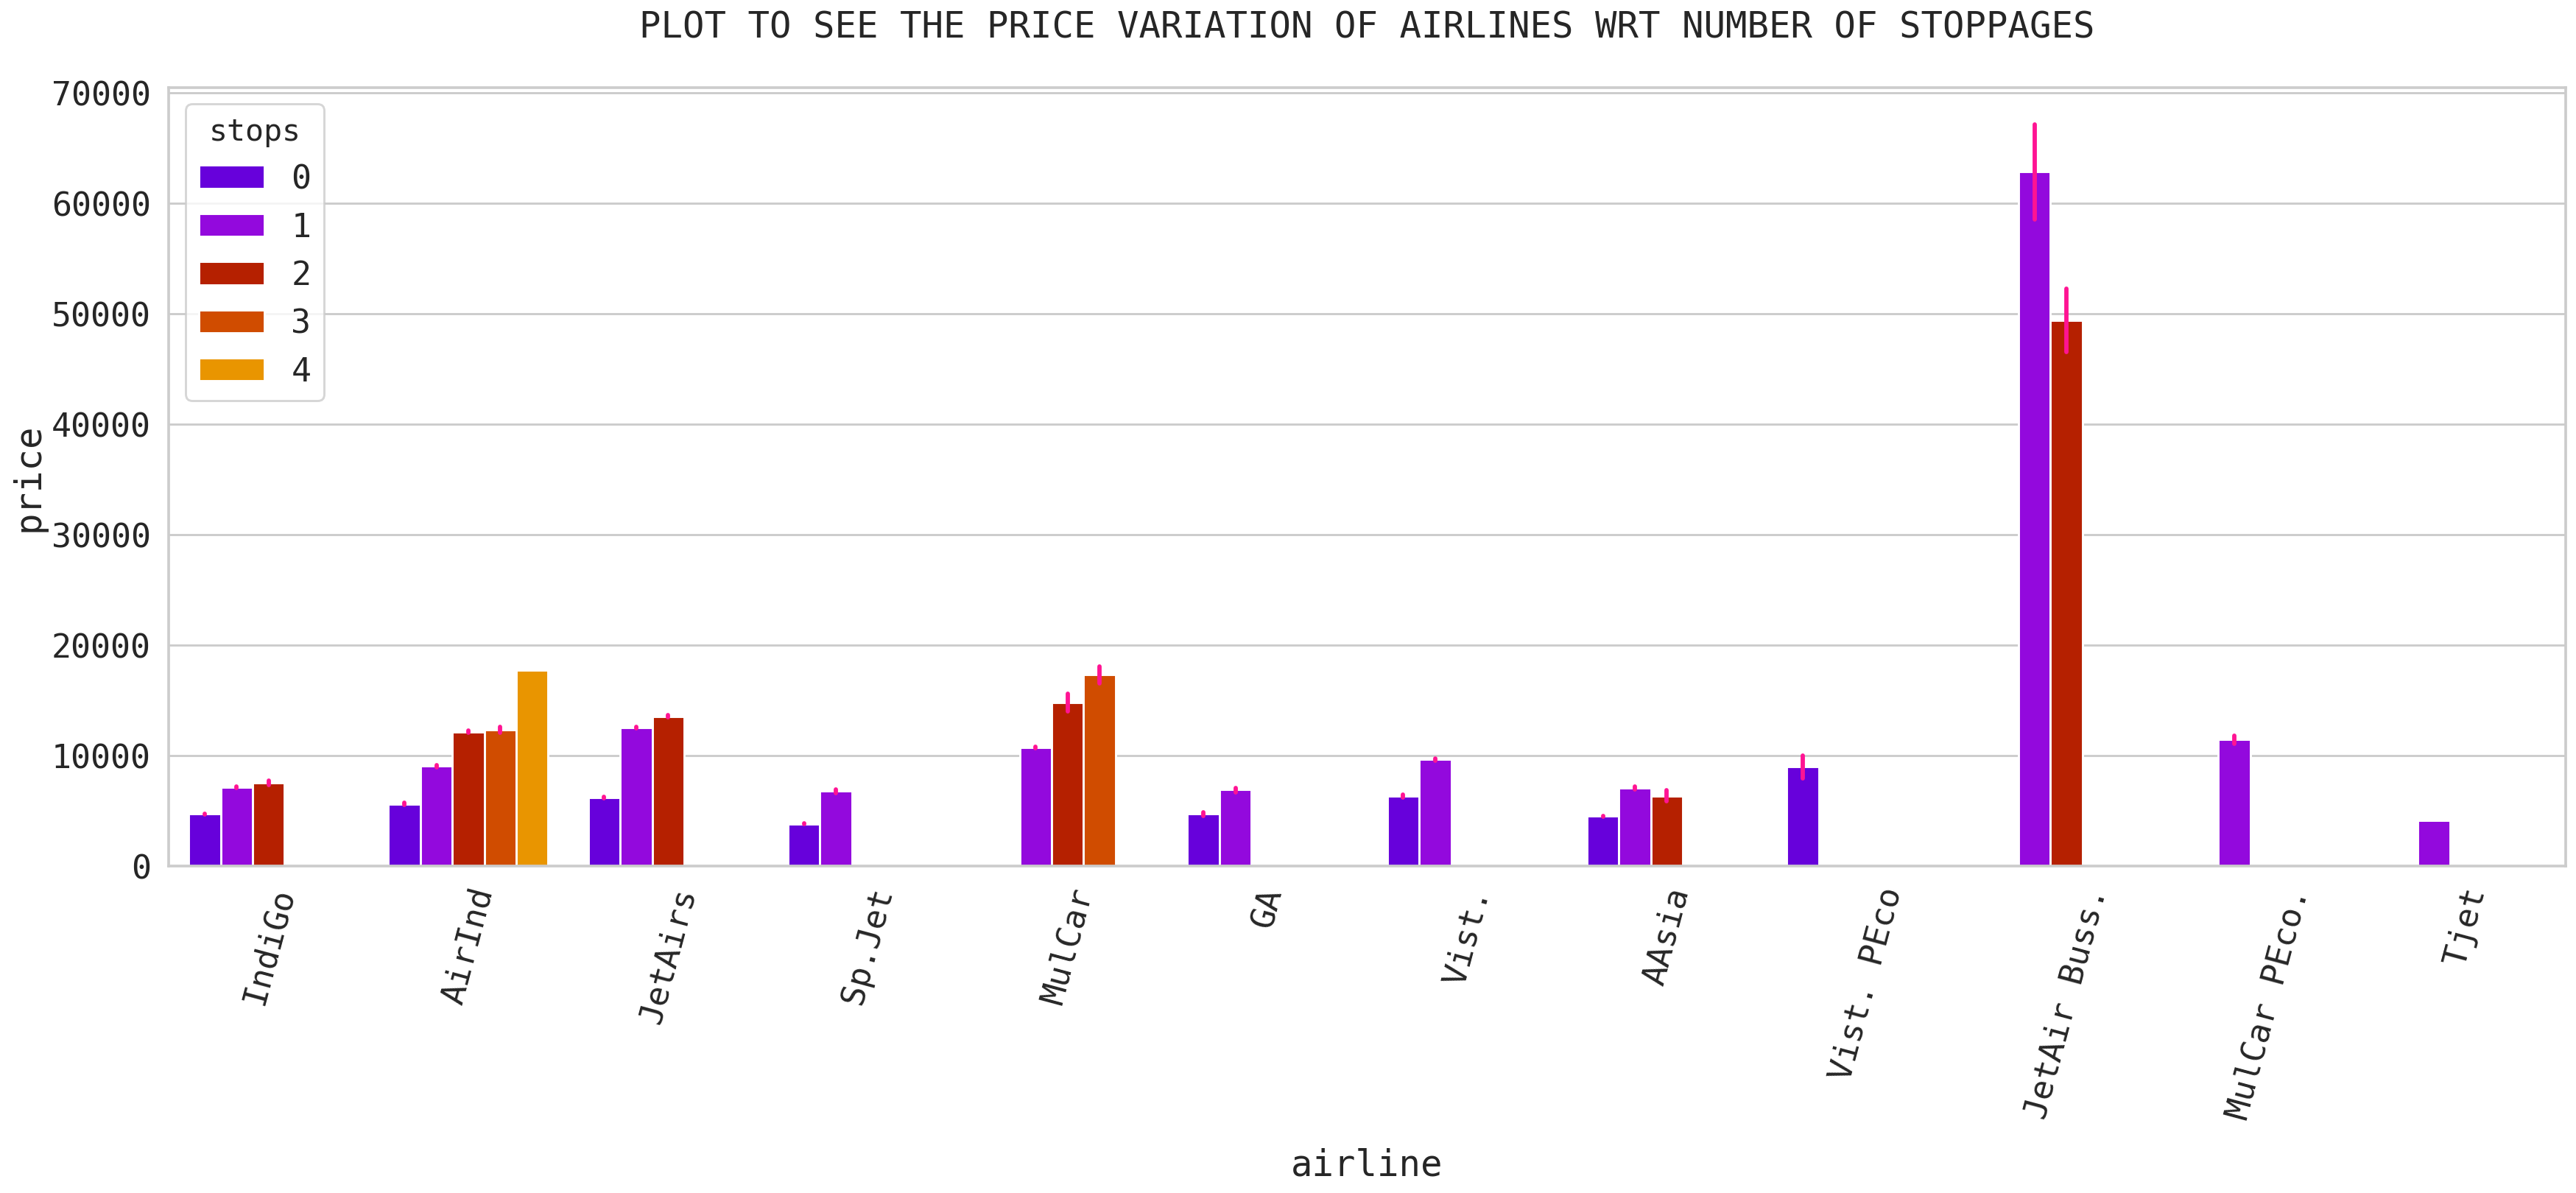

In [59]:
plt.figure(figsize=(30,10),dpi=140)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.4)
M=sns.barplot(x='airline',y='price',hue='stops',data=w,ci=55,orient='v',palette='gnuplot',saturation=25,errcolor='deeppink',errwidth=3)
M.set_xticklabels(M.get_xticklabels(),rotation=75)
plt.title('PLOT TO SEE THE PRICE VARIATION OF AIRLINES WRT NUMBER OF STOPPAGES\n')
plt.show()

                            THE PRICE OF JET AIR'S BUSSINESS IS TOO HIGH WITH 0 STOPS

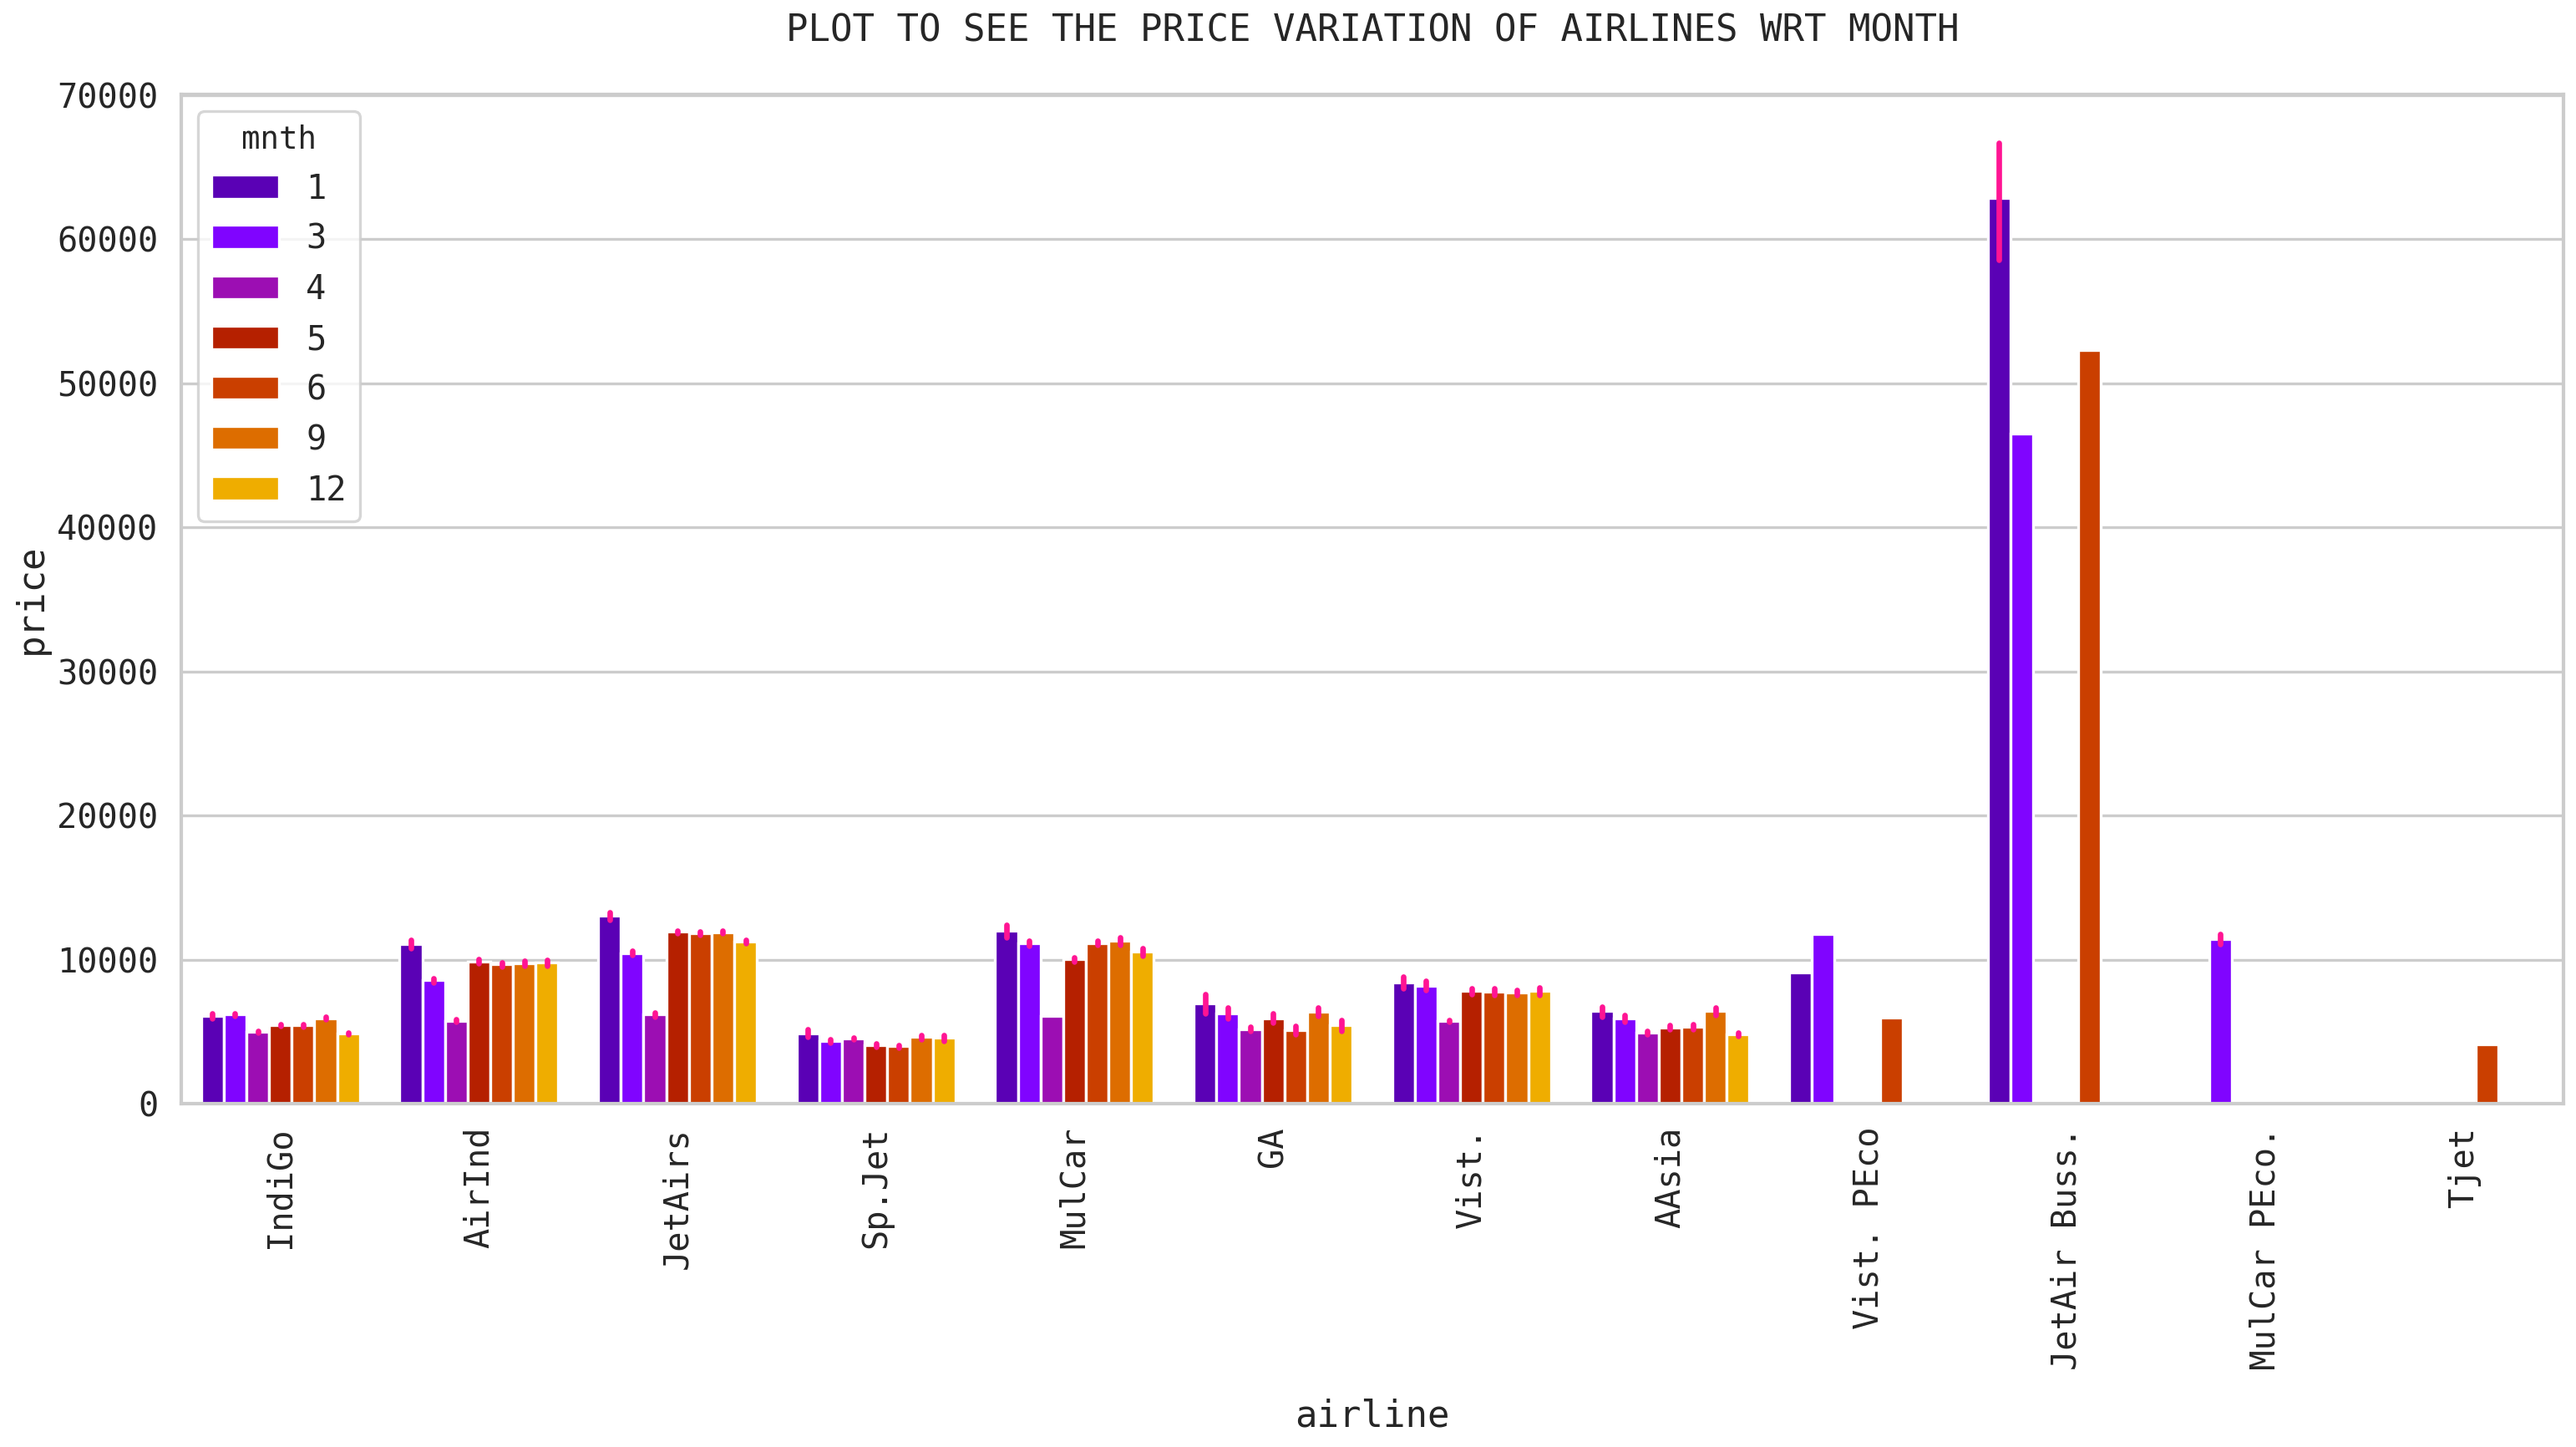

In [60]:
plt.figure(figsize=(23,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
M=sns.barplot(x='airline',y='price',hue='mnth',data=w,ci=55,orient='v',palette='gnuplot',saturation=25,errcolor='deeppink',errwidth=3)
M.set_xticklabels(M.get_xticklabels(),rotation=90)
plt.title('PLOT TO SEE THE PRICE VARIATION OF AIRLINES WRT MONTH\n')
plt.show()

                IN THE MONTH OF JANUARY,MARCH,JUNE THE PRICE OF  JETAIR'S BUSSINESS CLASS IS TOO HIGH

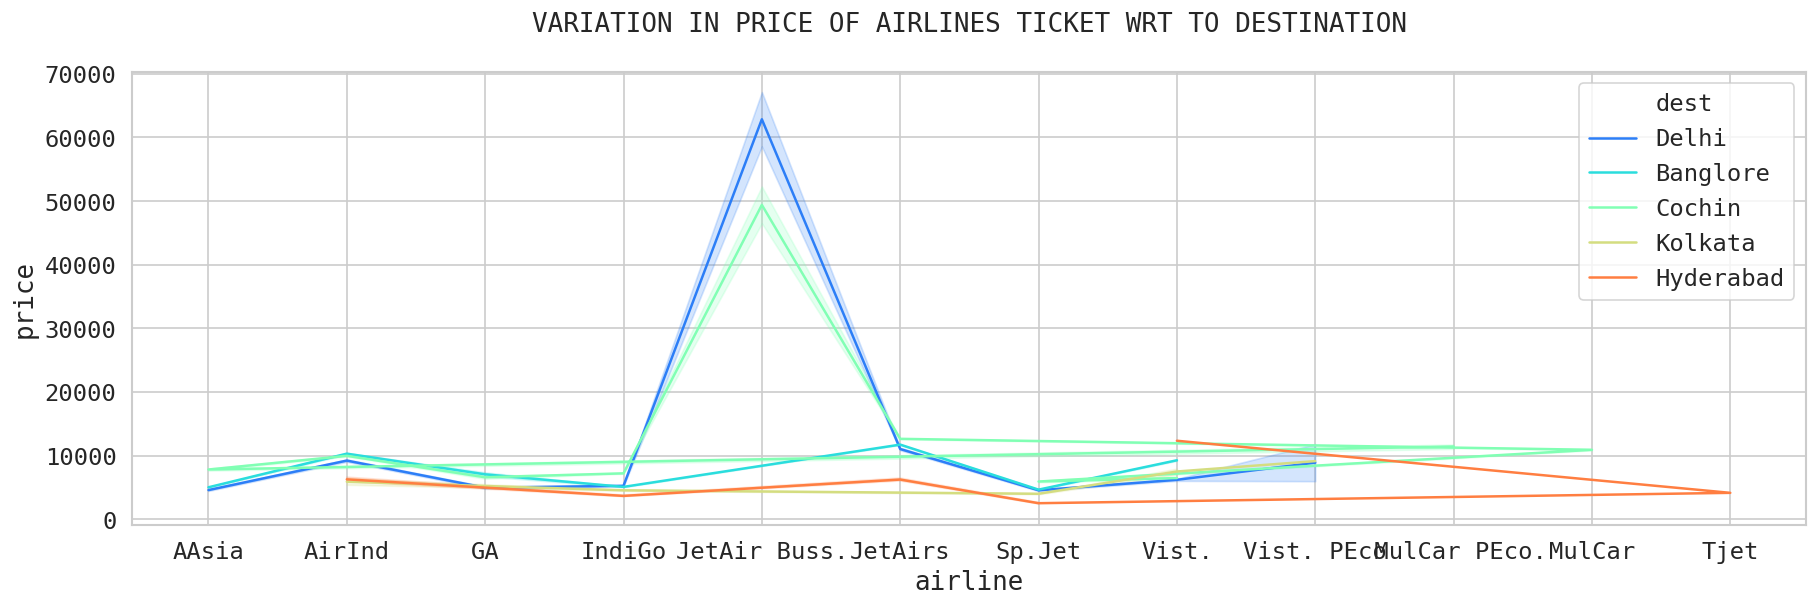

In [61]:
plt.figure(figsize=(18,5),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
sns.lineplot(x="airline", y='price',hue='dest',data=w,palette='rainbow',dashes=True,estimator='mean',ci=55,sort=True,err_style='band')
plt.title('VARIATION IN PRICE OF AIRLINES TICKET WRT TO DESTINATION\n')
plt.show()

        THE FLIGHT TICKETS OF INDIGO,JETAIR AND JET AIR BUSINESS CLASS IS HIGH IN DELHI & COCHIN BOUND FLIGHTS

In [62]:
#dropping src,dest,rt from w as they all are represented by r1,r2,r3,r4,r5
w.drop(['rt'],axis=1,inplace=True)

In [63]:
#dropping src,dest,rt from pred as they all are represented by r1,r2,r3,r4,r5
pred.drop(['rt'],axis=1,inplace=True)

In [64]:
#using label encoding to encode the object types to numerical form for w dataset
for i in w.columns:
    if w[i].dtypes=='object':
        ll=LabelEncoder()
        w[i]=ll.fit_transform(w[i])
w.dtypes

airline    int32
mnth       int64
date       int64
day        int64
src        int32
dest       int32
r1         int32
r2         int32
r3         int32
r4         int32
r5         int32
d_hr       int64
d_min      int64
a_hr       int64
a_min      int64
stops      int64
info       int32
price      int64
dtype: object

In [65]:
pred.dtypes

airline    object
mnth        int64
date        int64
day         int64
src        object
dest       object
r1         object
r2         object
r3         object
r4         object
r5         object
d_hr        int64
d_min       int64
a_hr        int64
a_min       int64
stops       int64
info       object
dtype: object

In [66]:
ll=LabelEncoder()
pred['airline']=ll.fit_transform(pred['airline'])
pred['src']=ll.fit_transform(pred['src'])
pred['dest']=ll.fit_transform(pred['dest'])
pred['r1']=ll.fit_transform(pred['r1'])
pred['r2']=ll.fit_transform(pred['r2'])
pred['r3']=ll.fit_transform(pred['r3'])
pred['r4']=ll.fit_transform(pred['r4'])
pred['r5']=ll.fit_transform(pred['r5'])
pred['info']=ll.fit_transform(pred['info'])

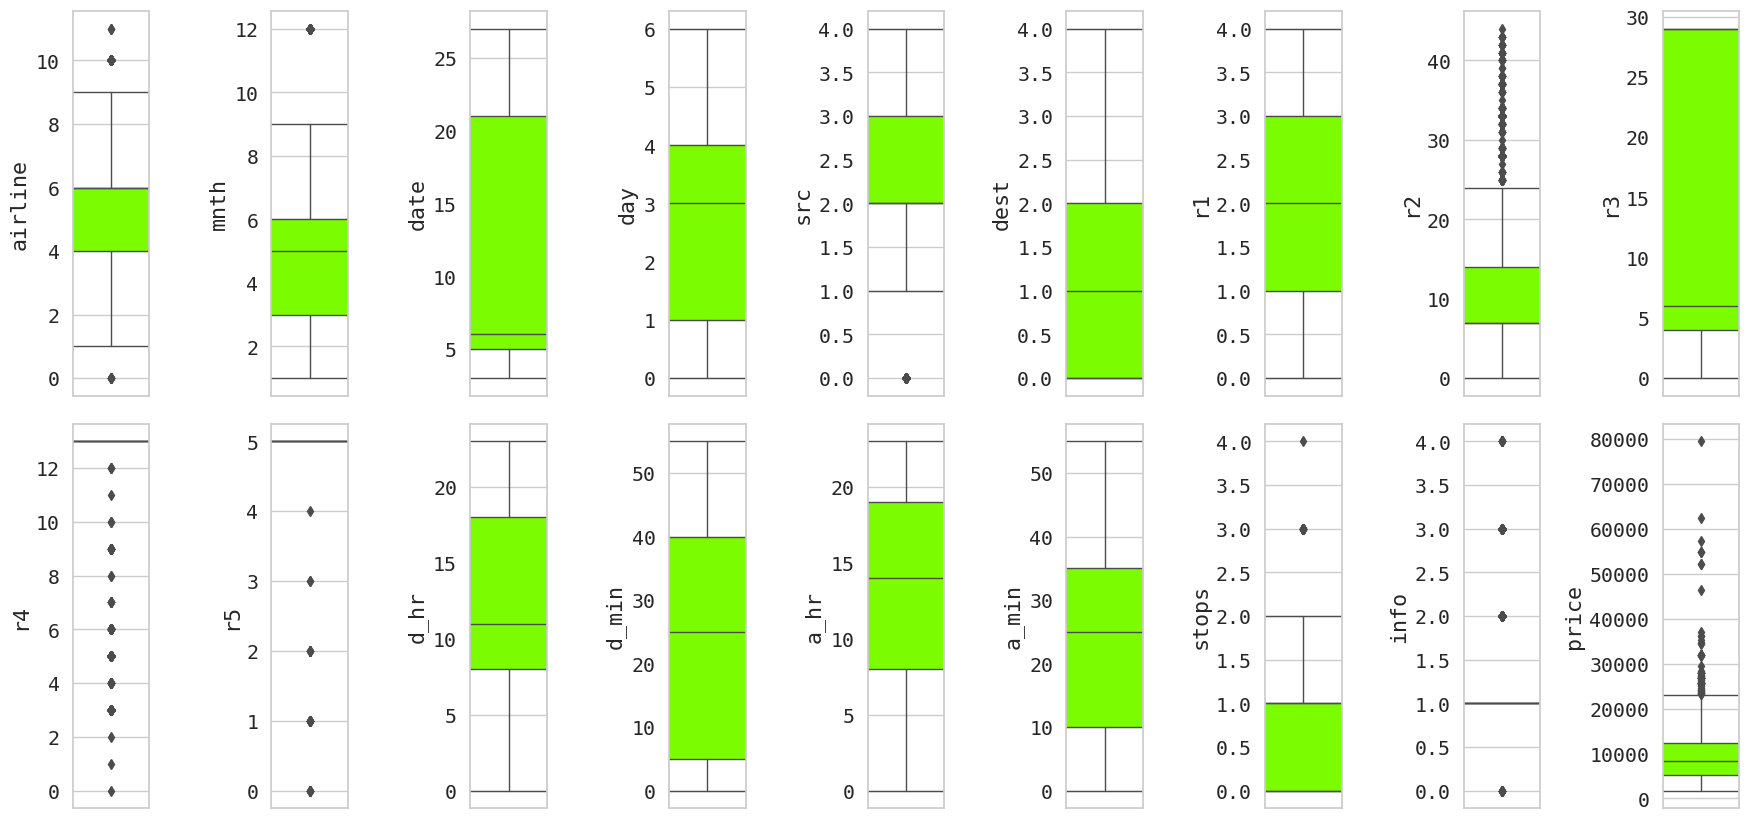

In [67]:
#PLOTTING BOXPLOT FOR W TO VISUALIZE OUTLIERS AND REMOVE THEM
cl=w.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,9,i+1)
    sns.boxplot(w[cl[i]],orient='v',color='lawngreen',saturation=35,width=2.5,linewidth=1)
plt.tight_layout()

In [68]:
ws=np.abs(zscore(w))
ws

array([[0.54362372, 0.84627523, 1.29342461, ..., 1.21467398, 0.50836743,
        1.10924806],
       [1.44970656, 1.51404128, 0.86784942, ..., 1.81311252, 0.50836743,
        0.29509405],
       [0.36245911, 1.1570229 , 0.75409815, ..., 1.81311252, 0.50836743,
        1.04993593],
       ...,
       [0.36245911, 0.51239221, 1.6346784 , ..., 1.21467398, 0.50836743,
        0.38872717],
       [2.17462479, 1.51404128, 1.09535194, ..., 1.21467398, 0.50836743,
        0.78309236],
       [1.44970656, 1.1570229 , 0.86784942, ..., 1.81311252, 0.50836743,
        0.58955509]])

In [69]:
print(np.where(ws>3))

(array([    1,    16,    31,   123,   125,   155,   164,   185,   191,
         249,   264,   291,   348,   365,   378,   396,   399,   402,
         402,   402,   432,   458,   470,   482,   486,   510,   525,
         530,   596,   597,   628,   656,   657,   665,   673,   719,
         784,   789,   825,   847,   852,   855,   876,   880,   892,
         918,   918,   935,   945,   957,   958,   960,   971,   974,
        1009,  1013,  1019,  1044,  1097,  1125,  1136,  1194,  1195,
        1201,  1202,  1207,  1209,  1210,  1216,  1216,  1216,  1244,
        1325,  1337,  1337,  1339,  1370,  1377,  1383,  1392,  1420,
        1458,  1462,  1474,  1477,  1488,  1491,  1554,  1567,  1587,
        1587,  1592,  1624,  1625,  1650,  1661,  1661,  1705,  1715,
        1747,  1778,  1791,  1834,  1868,  1885,  1909,  1940,  1944,
        1957,  1973,  2016,  2017,  2044,  2048,  2069,  2087,  2096,
        2139,  2152,  2159,  2160,  2160,  2160,  2173,  2193,  2217,
        2219,  2239

In [70]:
W=w[(ws<3).all(axis=1)]

In [71]:
print('Before outlier removal the shape was',w.shape,'\nAfter outliers removal the shape becomes',W.shape,
     '\nTotal of',len(w)-len(W),'rows were removed.')

Before outlier removal the shape was (10463, 18) 
After outliers removal the shape becomes (9897, 18) 
Total of 566 rows were removed.


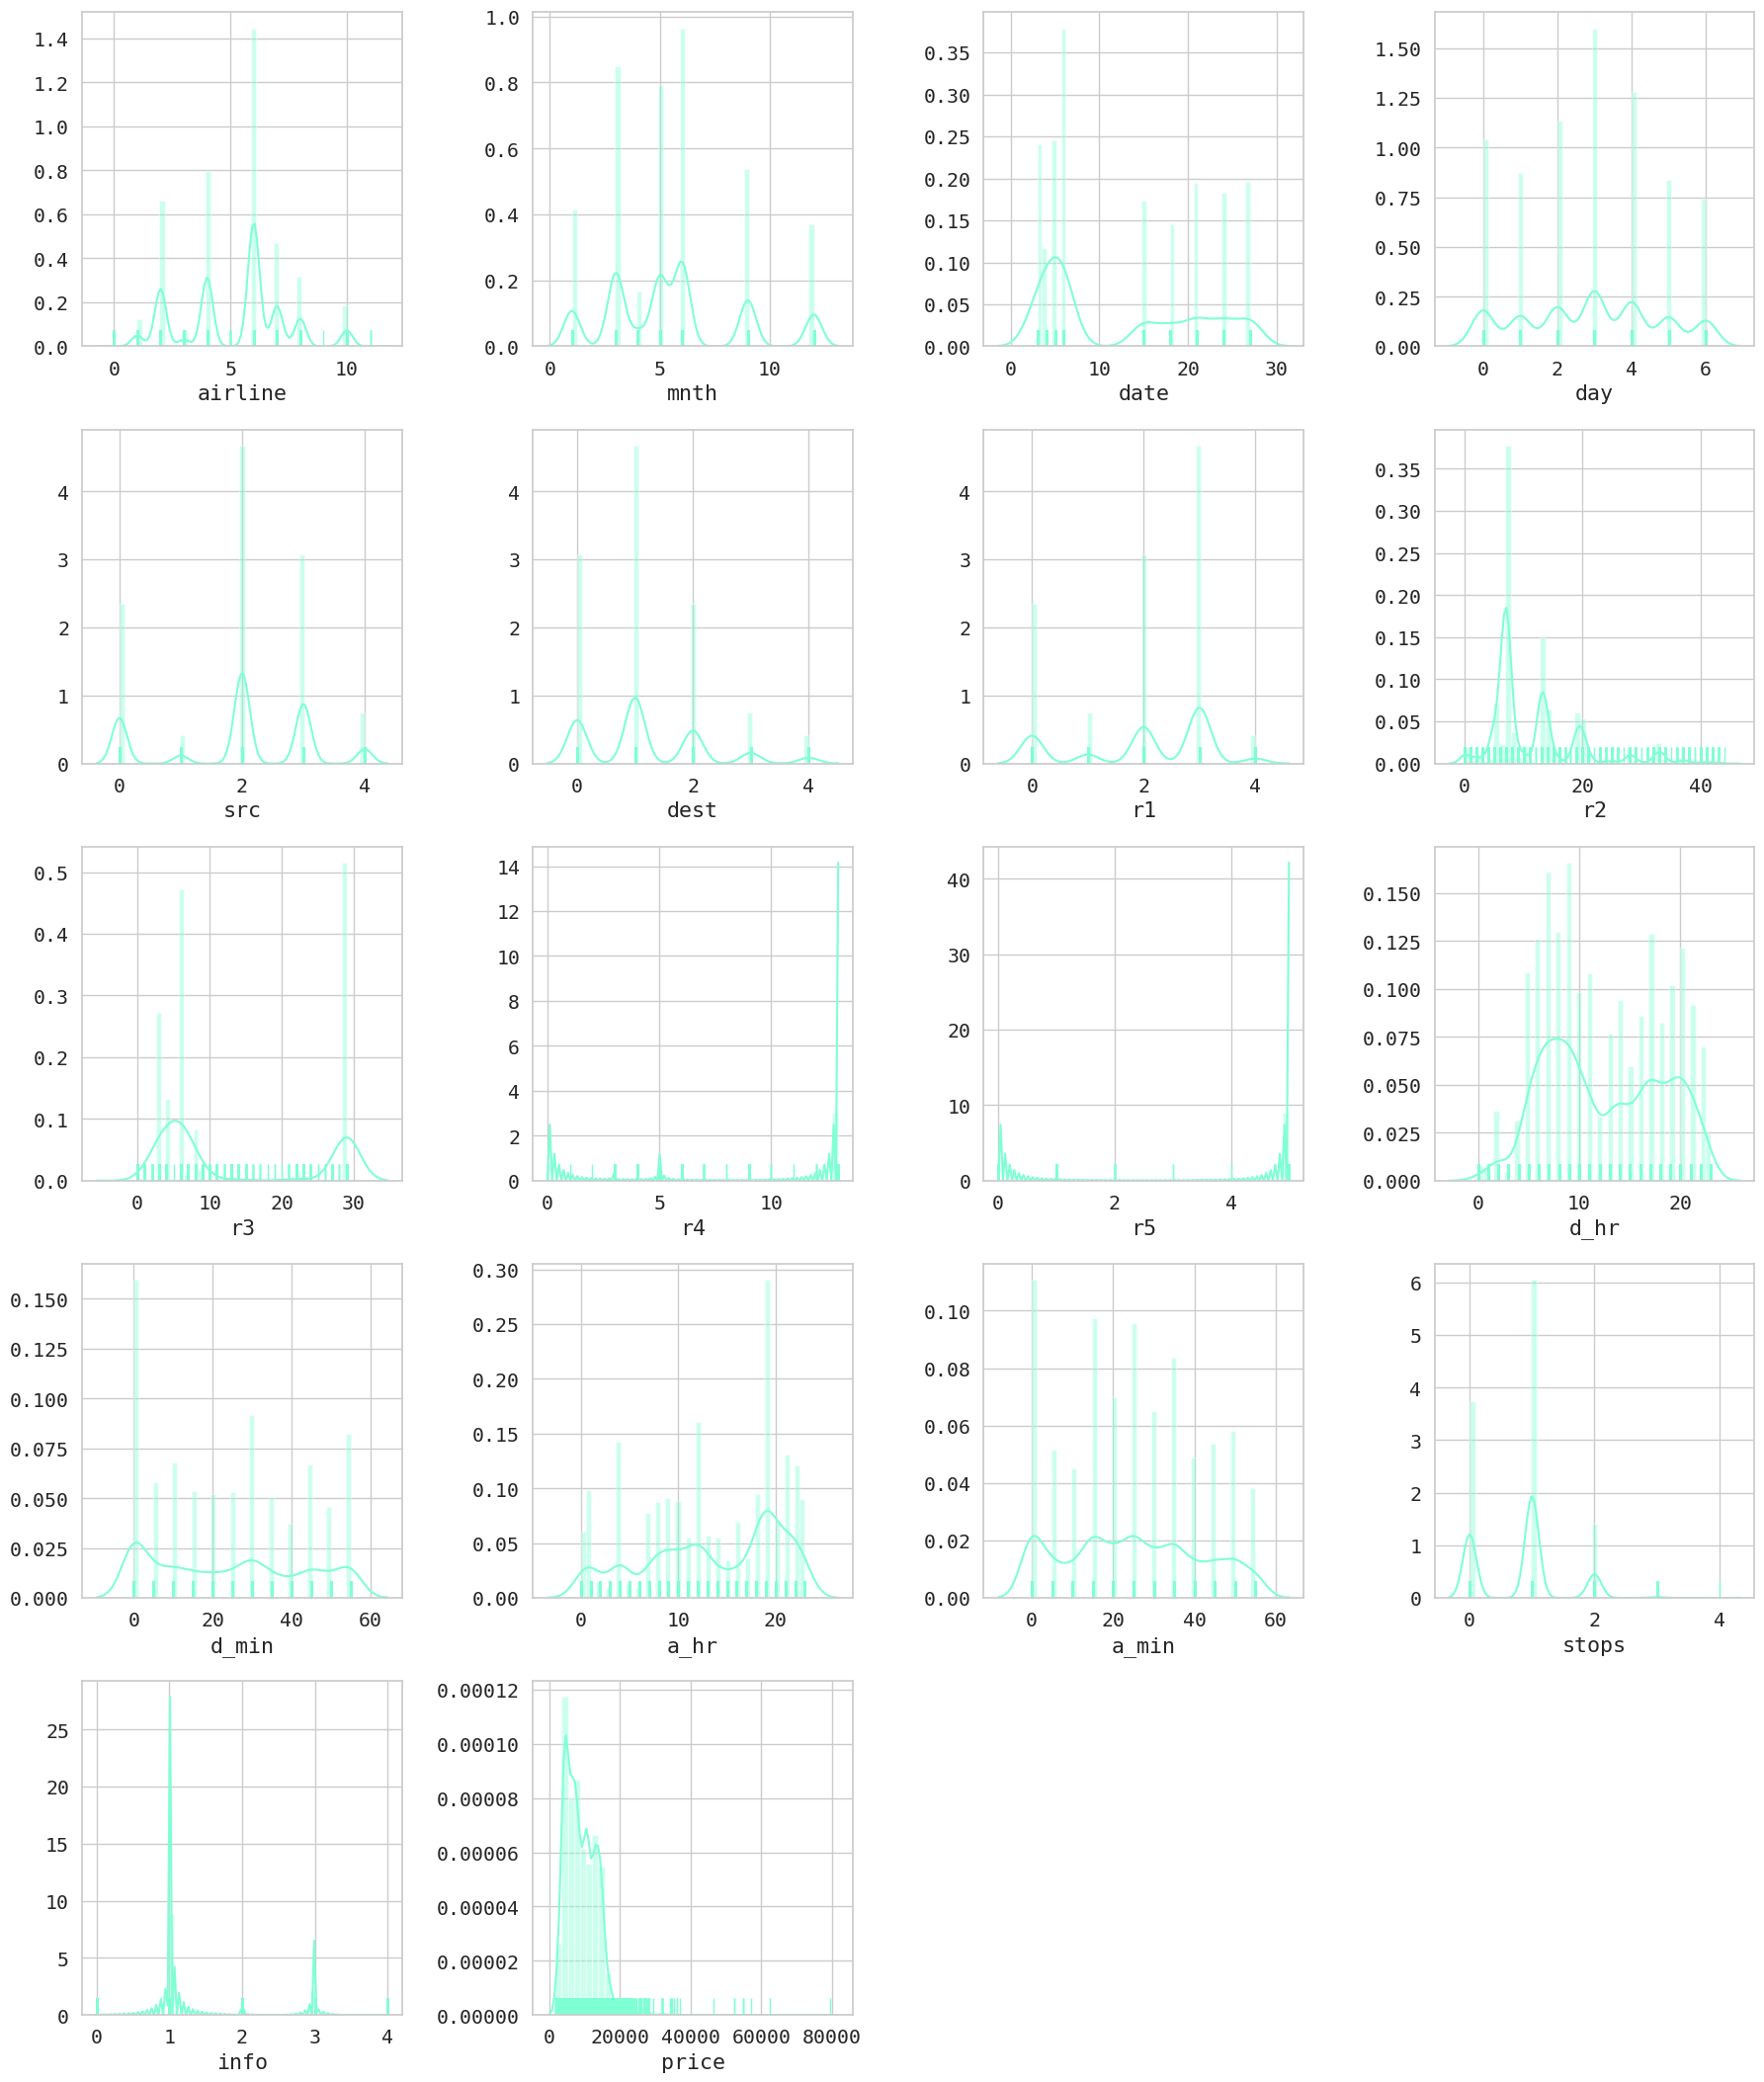

In [72]:
#PLOTTING DISTPLOT FOR W TO VISUALIZE THE SPREAD 
cl=W.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,4,i+1)
    sns.distplot(w[cl[i]],color='aquamarine',bins=45,rug=True,kde=True,hist=True)
plt.tight_layout()

In [73]:
#checking skewness() for W
W.skew()

airline   -0.094384
mnth       0.644934
date       0.352836
day        0.014698
src       -0.382655
dest       0.829512
r1        -0.596407
r2         1.364787
r3         0.536248
r4        -2.713487
r5         0.000000
d_hr       0.069012
d_min      0.186677
a_hr      -0.402259
a_min      0.105483
stops      0.233010
info       1.420502
price      0.487643
dtype: float64

In [74]:
for i in W.columns:
    if W.skew().loc[i]>0.55:
        W[i]=np.log1p(W[i])
    if W.skew().loc[i]<-0.55:
        W[i]=np.square(W[i])
print(W.skew())

airline   -0.094384
mnth      -0.519091
date       0.352836
day        0.014698
src       -0.382655
dest      -0.118935
r1         0.239993
r2         0.609901
r3         0.536248
r4        -2.703488
r5         0.000000
d_hr       0.069012
d_min      0.186677
a_hr      -0.402259
a_min      0.105483
stops      0.233010
info       1.363869
price      0.487643
dtype: float64


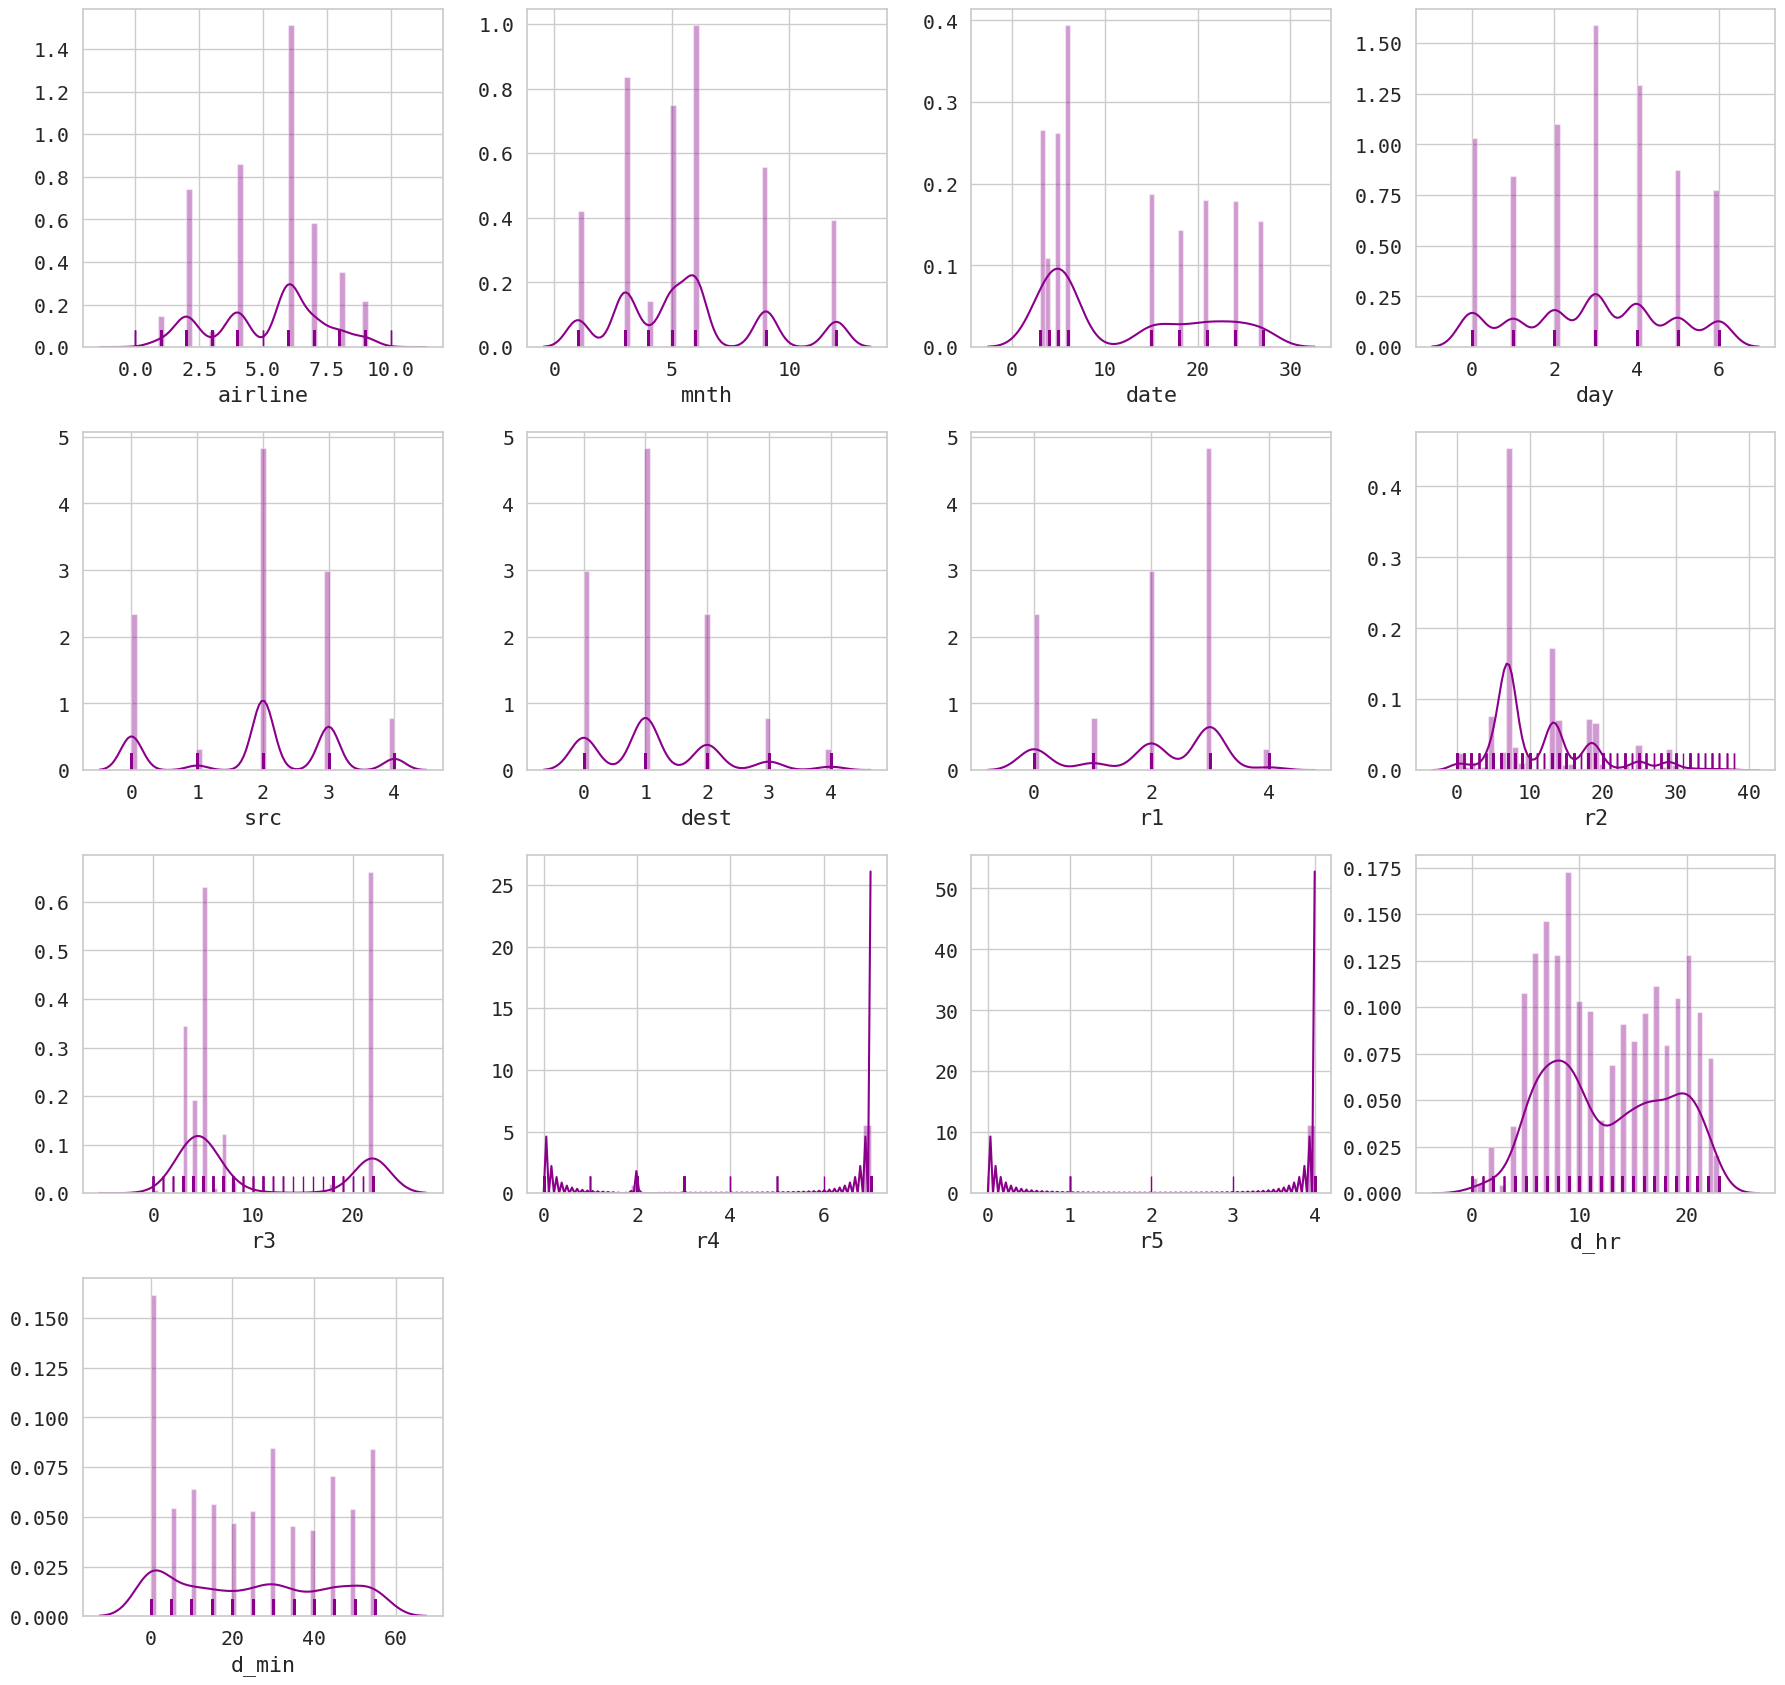

In [75]:
#PLOTTING DISTPLOT FOR W TO VISUALIZE THE SPREAD 
cl=pred.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,13):
    plt.subplot(6,4,i+1)
    sns.distplot(pred[cl[i]],color='darkmagenta',bins=45,rug=True,kde=True,hist=True)
plt.tight_layout()

In [76]:
#checking skew()
pred.skew()

airline    -0.272870
mnth        0.590701
date        0.478246
day        -0.026086
src        -0.424997
dest        0.794526
r1         -0.622460
r2          1.181986
r3          0.632178
r4         -2.278156
r5        -21.680529
d_hr        0.093759
d_min       0.128515
a_hr       -0.443166
a_min       0.115267
stops       0.321364
info        1.658607
dtype: float64

In [77]:
for i in pred.columns:
    if pred.skew().loc[i]>0.55:
        pred[i]=np.log1p(pred[i])
    if pred.skew().loc[i]<-0.55:
        pred[i]=np.square(pred[i])

<Figure size 1440x360 with 0 Axes>

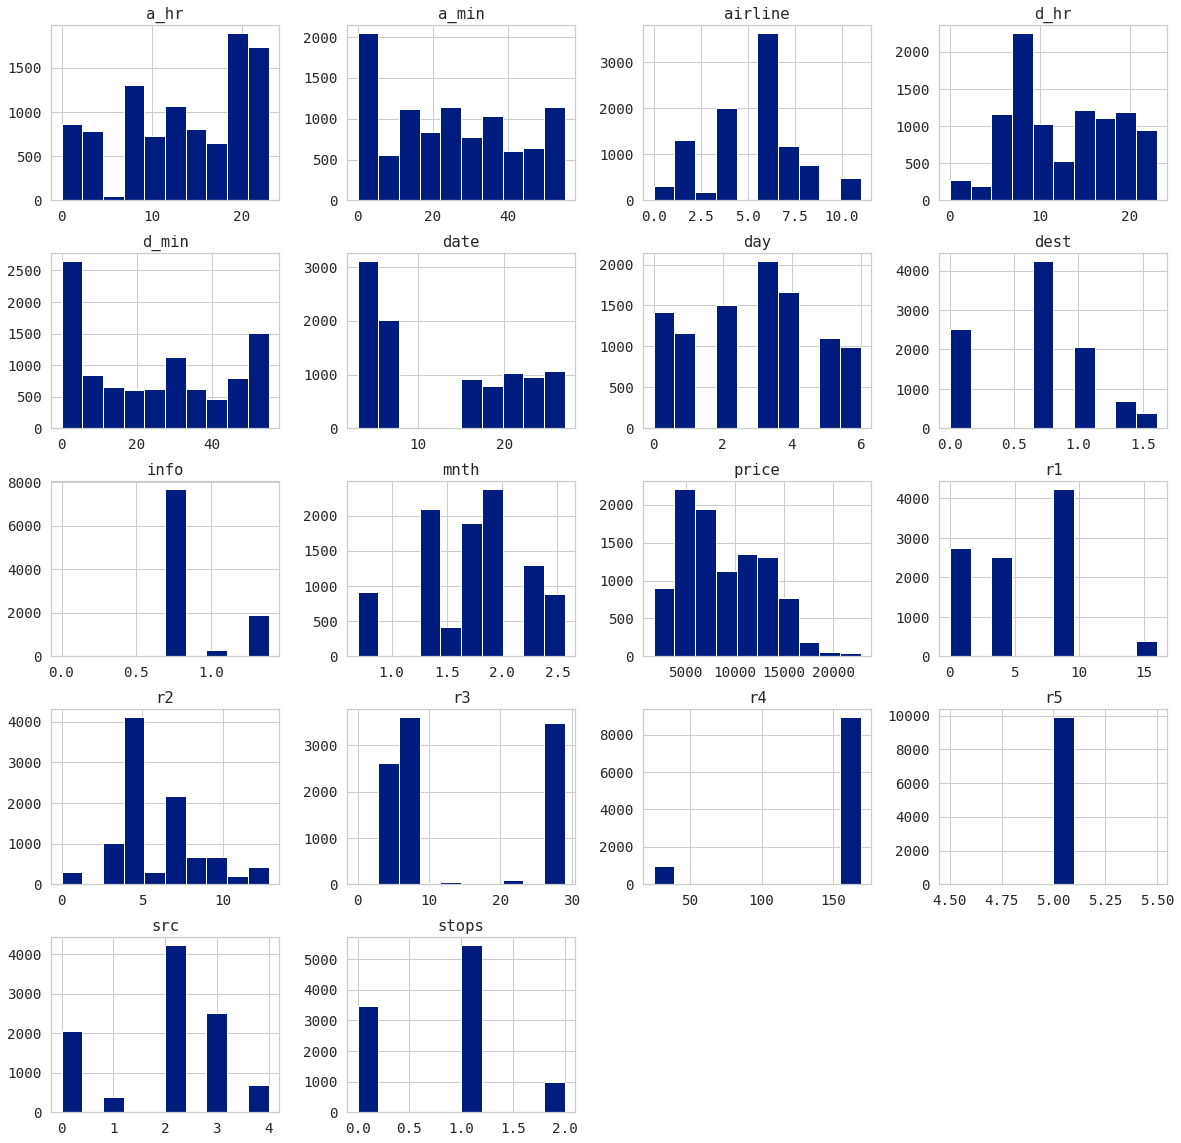

In [78]:
sns.set_context('talk',font_scale=1.9)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(12,3),dpi=120)
W.hist(figsize=(20,20),grid=True)
plt.show()

In [79]:
#importing important librarier for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')



In [80]:
W.head(3)

,airline,mnth,date,day,src,dest,r1,r2,r3,r4,r5,d_hr,d_min,a_hr,a_min,stops,info,price
0,4,1.386294,24,6,0,1.098612,0,6.964624,29,169,5,22,20,1,10,0,0.693147,3897
2,6,2.302585,6,4,2,0.693147,9,12.225565,4,25,5,9,25,4,25,2,0.693147,13882
3,4,2.564949,5,3,3,0.000000,4,12.640500,3,169,5,18,5,23,30,1,0.693147,6218


In [81]:
X=W.drop(['price'],axis=1)
y=W['price']

In [82]:
#using standard scaler on x to scale the values
ss=StandardScaler()
X=ss.fit_transform(X)

In [83]:
from sklearn.decomposition import PCA
pca=PCA(13)
pca.fit(X)
x=pca.transform(X)
print(x)
print('\npca.explained_variance_ratio_=',pca.explained_variance_ratio_.sum())

[[-2.74429466  0.16490228 -0.84077736 ... -1.33989573  0.82504032
  -1.45924675]
 [ 2.38896249  3.08840404 -1.15542187 ...  0.21325313  0.076542
  -0.80077685]
 [ 1.15746026 -0.33349395 -1.53053988 ... -0.26395966 -0.29448682
  -0.32702521]
 ...
 [-2.68782081  0.56817838  0.22023129 ... -0.52333408  0.33409617
  -1.75397473]
 [-2.6800721   0.09598179  0.50446173 ...  1.07649074  1.92624482
   0.63554794]
 [ 2.64724278  3.31383889 -1.09854398 ... -0.08001235 -0.55659052
  -0.26942663]]

pca.explained_variance_ratio_= 0.947339688787087


In [84]:
#converting y interm of np.array and reshaping in form of many rows and one column
y=np.array(y)
y=y.reshape(-1,1)

In [85]:
print('Shape of x=', x.shape,'\nShape of y=',y.shape)

Shape of x= (9897, 13) 
Shape of y= (9897, 1)


In [86]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    r2=0
    for i in range(27,220):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
          '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

LINEAR REGRESSION

In [87]:
lireg=LinearRegression()
A=model(lireg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  172 
 r2 score =  0.5242121013265244 
 mean abs error value (MAE)=  2263.9906441664716 
 mean squared error value (MSE)=  8105291.159670885 
 & root mean sq error (RMSE)=  2846.979304398064


In [88]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,x,y,cv=50,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.5333499076834674


LASSO REGRESSION

In [89]:
#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001),'max_iter':(20,40,50,90,150)}
lso_rsv=rsv(lso,lso_para,cv=60,n_iter=50)
lso_rsv.fit(x,y)
print(lso_rsv)
print('\nbest_score=',lso_rsv.best_score_)
print('\nbest_parameters=',lso_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.01, 0.1, 1.0, 10, 0.001),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.5333357911706388

best_parameters= {'max_iter': 20, 'alpha': 1.0}


In [90]:
lso=Lasso(alpha=10,max_iter=90)
B=model(lso,x,y)

In this Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=90, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False) model 
 Random State=  172 
 r2 score =  0.5238462839665454 
 mean abs error value (MAE)=  2264.212416446519 
 mean squared error value (MSE)=  8111523.046236639 
 & root mean sq error (RMSE)=  2848.073567560473


In [91]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,x,y,cv=50,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.5332980277946432


RIDGE REGRESSION

In [92]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
rid_rsv=rsv(rid,rid_para,cv=50,n_iter=60)
rid_rsv.fit(x,y)
print(rid_rsv)
print('\nbest_score=',rid_rsv.best_score_)
print('\nbest_parameters=',rid_rsv.best_params_)

RandomizedSearchCV(cv=50, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=60, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.5333420059617241

best_parameters= {'max_iter': 20, 'alpha': 12}


In [93]:
rid=Ridge(alpha=12,max_iter=20)
C=model(rid,x,y)


In this Ridge(alpha=12, copy_X=True, fit_intercept=True, max_iter=20, normalize=False,
      random_state=None, solver='auto', tol=0.001) model 
 Random State=  172 
 r2 score =  0.5242019683670776 
 mean abs error value (MAE)=  2263.8932838002734 
 mean squared error value (MSE)=  8105463.7798380945 
 & root mean sq error (RMSE)=  2847.00962060863


In [94]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,x,y,cv=60,scoring='r2')
print('the R2 score at  RIDGE model is=',rid_scr.mean())

the R2 score at  RIDGE model is= 0.5333516088424392


ELASTIC NET

In [95]:
#checking for best parameters for ELASTIC using RandomizedSearchCV
els=ElasticNet()
els_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150),'warm_start':(False,True)}
els_rsv=rsv(els,els_para,cv=60,n_iter=50)
els_rsv.fit(x,y)
print(els_rsv)
print('best_score=',els_rsv.best_score_)
print('best_parameters=',els_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150),
                                        'warm_start': (False, True)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
best_score= 0.5333491400077526

In [96]:
els=ElasticNet(max_iter=150,alpha=0.01,warm_start=True)
D=model(els,x,y)

In this ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=150, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=True) model 
 Random State=  172 
 r2 score =  0.5241783223092241 
 mean abs error value (MAE)=  2263.738992749707 
 mean squared error value (MSE)=  8105866.602575316 
 & root mean sq error (RMSE)=  2847.0803646148306


In [97]:
#CHECKING FOR OVER/UNDER FITTING
els_scr=cvs(els,x,y,cv=40,scoring='r2')
print('the R2 score at ELASTIC NET model is=',els_scr.mean())

the R2 score at ELASTIC NET model is= 0.5340531277061066


DECISION TREE REGRESSOR

In [98]:
#HYPERPARAMETER TUNING WITH RANDOMIZED_SEARCH_CV
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':(10,12,19),
    'min_samples_split':range(3,12)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
print(dtr_rsv)
print(dtr_rsv.best_score_)
print(dtr_rsv.best_params_)

RandomizedSearchCV(cv=80, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_d

In [101]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=17,min_samples_split=7,splitter='random')
E=model(dtr,x,y)

In this DecisionTreeRegressor(criterion='mse', max_depth=17, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='random') model 
 Random State=  37 
 r2 score =  0.6103966772012002 
 mean abs error value (MAE)=  1594.537653039628 
 mean squared error value (MSE)=  6637092.655916174 
 & root mean sq error (RMSE)=  2576.2555494197727


In [102]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= 0.6589525304567054


SVR

In [103]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=50,n_iter=50)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'linear', 'gamma': 0.001}

In [104]:
svr=SVR(kernel='linear',gamma=0.001,C=8)
F=model(svr,x,y)

In this SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  179 
 r2 score =  0.49319767413682747 
 mean abs error value (MAE)=  2238.174562483438 
 mean squared error value (MSE)=  8633637.852017982 
 & root mean sq error (RMSE)=  2938.305268691118


In [105]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= 0.507162859527617


KNEIGHBORS REGRESSOR

In [106]:
knr=KNeighborsRegressor()
kp={'n_neighbors':(4,5,8,10),'algorithm':('ball_tree','kd_tree','brute'),'leaf_size':range(5,15)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
k_rsv.best_params_

{'n_neighbors': 4, 'leaf_size': 12, 'algorithm': 'brute'}

In [107]:
knr=KNeighborsRegressor(n_neighbors=4,leaf_size=12,algorithm='brute')
G=model(knr,x,y)

In this KNeighborsRegressor(algorithm='brute', leaf_size=12, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform') model 
 Random State=  190 
 r2 score =  0.7965304127435269 
 mean abs error value (MAE)=  1183.156228956229 
 mean squared error value (MSE)=  3466208.895707071 
 & root mean sq error (RMSE)=  1861.7757372216104


In [110]:
#CHECKING FOR OVER/UNDER FITTING
knr_scr=cvs(knr,x,y,cv=10,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= 0.8136849458411806


RANDOM FOREST REGRESSOR

In [111]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,8),'min_samples_leaf':range(3,6),'max_depth':[3,8,13]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 3,
 'max_features': 7,
 'max_depth': 13}

In [112]:
rfr=RandomForestRegressor(n_estimators=250,max_features=7,min_samples_leaf=3,max_depth=13)
model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  162 
 r2 score =  0.7651843542664007 
 mean abs error value (MAE)=  1436.0554874426407 
 mean squared error value (MSE)=  4000205.0973203024 
 & root mean sq error (RMSE)=  2000.0512736728283


In [113]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at RFR model is=',rfr_scr.mean())

the R2 score at RFR model is= 0.7932888757954858


**CREATING A DATAFRAME FOR TABULAR VIEW OF ALL ALGORITHMS & THEIR PERFORMANCES**

In [114]:
infos=[['LINEAR_REG',172,0.5242121,0.5333499],
      ['LASSO',172, 0.52384628, 0.5332980],
      ['RIDGE',172,0.52420196, 0.5333516],
      ['ELASTIC NET',172,0.52417832,0.534053127],
      ['DECISION TREE REGRESSOR',37,0.61039667,0.65895253],
      ['SVR',179,0.4931976,0.50716285],
      ['KNEIGHBORS_REGRESSOR',190,0.796530412,0.8136849],
      ['RANDOM FOREST REGRESSOR',160,0.76518435,0.7932888]]


R2=pd.DataFrame(infos,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])

R2.style.set_properties(**{'background-color': 'darkslategrey','color': 'ivory','border-color': 'lightsteelblue'})



,MOD_NAME,RAND_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,172,0.524212,0.53335
1,LASSO,172,0.523846,0.533298
2,RIDGE,172,0.524202,0.533352
3,ELASTIC NET,172,0.524178,0.534053
4,DECISION TREE REGRESSOR,37,0.610397,0.658953
5,SVR,179,0.493198,0.507163
6,KNEIGHBORS_REGRESSOR,190,0.79653,0.813685
7,RANDOM FOREST REGRESSOR,160,0.765184,0.793289


*From the above it is clear that model are underperformed and here we'll use*  **ADABOOST REGRESSOR** *with* **KNR** 
*as base model*

In [115]:
from sklearn.ensemble import AdaBoostRegressor

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=173)
knr=KNeighborsRegressor(n_neighbors=4,leaf_size=12,algorithm='brute')
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=knr)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

best parameters: {'learning_rate': 0.01}

 best score: 0.8085980938468827


In [117]:
abr=AdaBoostRegressor(base_estimator=knr,learning_rate=0.01)
model(abr,x,y)

In this AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='brute',
                                                     leaf_size=12,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=4,
                                                     p=2, weights='uniform'),
                  learning_rate=0.01, loss='linear', n_estimators=50,
                  random_state=None) model 
 Random State=  190 
 r2 score =  0.8034834929575811 
 mean abs error value (MAE)=  1143.7822390572392 
 mean squared error value (MSE)=  3347759.60401936 
 & root mean sq error (RMSE)=  1829.688389868439


*So from above results it can be seen that* **ABR**   *is giving optimum result so selecting it as the final model*

In [118]:
joblib.dump(abr,'flight_ABR.pkl')

['flight_ABR.pkl']

**Recalling the saved model for prediction of our given test data**

In [119]:
seer=joblib.load('flight_ABR.pkl')

In [120]:
pred

,airline,mnth,date,day,src,dest,r1,r2,r3,r4,r5,d_hr,d_min,a_hr,a_min,stops,info
0,6,1.945910,6,3,2,0.693147,9,4.324077,3.135494,49,16,17,30,4,25,1,0.693147
1,4,2.564949,5,3,3,0.000000,4,11.568144,0.693147,0,16,6,20,10,20,1,0.693147
2,6,1.791759,21,1,2,0.693147,9,4.324077,1.609438,4,16,19,15,19,0,1,1.386294
3,7,1.791759,21,1,2,0.693147,9,4.324077,1.386294,49,16,8,0,21,0,1,0.693147
4,1,1.945910,24,0,0,1.098612,0,6.964624,2.079442,49,16,23,55,2,45,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2,1.945910,6,3,3,0.000000,4,7.333536,2.079442,49,16,20,30,20,25,1,0.693147
2667,4,1.386294,27,2,3,0.000000,4,3.210402,3.135494,49,16,14,20,16,55,0,0.693147
2668,6,1.945910,3,0,2,0.693147,9,4.324077,2.397895,0,16,21,50,4,25,1,0.693147
2669,2,1.945910,3,0,2,0.693147,9,4.324077,3.135494,49,16,4,0,19,15,1,0.693147


In [121]:
Y=ss.fit_transform(pred)

In [123]:
Y

array([[ 0.38594797,  0.34449961, -0.70385305, ...,  0.02633999,
         0.24785314, -0.48357036],
       [-0.54611987,  1.56592191, -0.82063721, ..., -0.27177067,
         0.24785314, -0.48357036],
       [ 0.38594797,  0.04034589,  1.04790943, ..., -1.46421332,
         0.24785314,  2.15183828],
       ...,
       [ 0.38594797,  0.34449961, -1.05420554, ...,  0.02633999,
         0.24785314, -0.48357036],
       [-1.47818772,  0.34449961, -1.05420554, ..., -0.56988133,
         0.24785314, -0.48357036],
       [ 0.8519819 ,  0.34449961,  0.34720444, ..., -0.56988133,
         0.24785314, -0.48357036]])

In [125]:
pca=PCA(13)
pca.fit(Y)
y=pca.transform(Y)
print(y)

[[ 0.42895994 -0.47389949 -0.49622131 ... -0.59377596  0.68082121
  -0.53084849]
 [ 1.17859986  1.96657219  1.79635613 ... -0.96580225  0.01263017
  -0.87284927]
 [ 1.08087046 -0.26624841 -1.93899447 ...  0.36543616  1.36443943
  -0.96672788]
 ...
 [ 0.38545152  0.37941637 -0.32191462 ... -1.37194227  1.17261023
  -1.72074079]
 [ 0.74735802  1.49893624 -0.5254114  ...  1.41843354 -0.53175054
  -0.45040293]
 [ 0.68482009  1.48048805 -0.50390633 ... -0.68668888 -0.95447066
  -2.46348829]]


*predicting the values*

In [126]:
prediction=seer.predict(y)

*saving the prediction to a csv file*

In [129]:
from numpy import savetxt
savetxt('FLIGHT_PRICE_PREDICTION.csv',prediction,delimiter=',')